In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import connection

In [3]:
conn = connection()

In [4]:
df_indices = pd.read_sql("SELECT * FROM moex_iss_indices", conn)

In [5]:
df_indices.head(5)

date       open      close index_code
0 2017-01-03  2083.8808  2083.8808       BPSI
1 2017-01-04  2084.3644  2084.3644       BPSI
2 2017-01-05  2085.3231  2085.3231       BPSI
3 2017-01-06  2086.0584  2086.0584       BPSI
4 2017-01-09  2088.1927  2088.1927       BPSI

In [6]:
df_indices.shape

(114008, 4)

In [7]:
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114008 entries, 0 to 114007
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        114008 non-null  datetime64[ns]
 1   open        112876 non-null  float64       
 2   close       114008 non-null  float64       
 3   index_code  114008 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.5+ MB


In [8]:
df_indices.describe()

date           open          close
count                         114008  112876.000000  114008.000000
mean   2021-12-21 23:45:33.029261056    2534.033918    2525.372150
min              2017-01-03 00:00:00      -1.950000      -1.950000
25%              2020-01-13 00:00:00     145.767500     147.742500
50%              2022-03-28 00:00:00    1117.430000    1134.685000
75%              2024-02-13 00:00:00    2582.100000    2557.360250
max              2025-10-13 00:00:00   44538.430000   44955.570000
std                              NaN    4601.211584    4575.024767

In [9]:
df_indices.isnull().sum()

date             0
open          1132
close            0
index_code       0
dtype: int64

In [10]:
df_indices.nunique()

date           2223
open          82930
close         84490
index_code       72
dtype: int64

In [11]:
df_indices.index_code.unique()

array(['BPSI', 'BPSIG', 'EPSITR', 'IMOEX', 'IMOEX2', 'IMOEXCNY', 'IMOEXW',
       'MCXSM', 'MESG', 'MIPO', 'MOEX10', 'MOEXALLW', 'MOEXBC', 'MOEXBMI',
       'MOEXCH', 'MOEXCN', 'MOEXEU', 'MOEXFN', 'MOEXINN', 'MOEXIT',
       'MOEXMM', 'MOEXOG', 'MOEXRE', 'MOEXTL', 'MOEXTN', 'MRBC', 'MREF',
       'MREFTR', 'MRRT', 'MRSV', 'MRSVR', 'MXSHAR', 'MXTDFI2030',
       'MXTDFI2035', 'MXTDFI2040', 'MXTDFI2045', 'RGBILP', 'RGBITR',
       'RTSCH', 'RTSCR', 'RTSEU', 'RTSFN', 'RTSI', 'RTSIT', 'RTSMM',
       'RTSOG', 'RTSRE', 'RTSSM', 'RTSTL', 'RTSTN', 'RUABITR', 'RUBMI',
       'RUCBTRNS', 'RUGOLD', 'RUMBTRNS', 'RUPAI', 'RUPCI', 'RUPMI',
       'RUSFAR', 'RUSFAR1M', 'RUSFAR1MRT', 'RUSFAR1W', 'RUSFAR1WRT',
       'RUSFAR2W', 'RUSFAR2WRT', 'RUSFAR3M', 'RUSFAR3MRT', 'RUSFARC1WR',
       'RUSFARCN1W', 'RUSFARCNRT', 'RUSFARCNY', 'RUSFARRT'], dtype=object)

In [12]:
df_indices['change'] = df_indices['close'] - df_indices['open']
df_indices['pct_change'] = df_indices['change'] / df_indices['open'] * 100

In [13]:
df_indices['change'].describe()

count    112876.000000
mean         -1.153272
std          74.998418
min       -5865.190000
25%          -0.280000
50%           0.000000
75%           0.090000
max        5269.100000
Name: change, dtype: float64

In [14]:
df_indices['pct_change'].describe()


/Users/vanoney30/Documents/Магистратура/ВШЭ/Годовой проект/stocks/russian-stocks-prediction-ml-dl/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    1.128420e+05
mean              NaN
std               NaN
min              -inf
25%     -7.305041e-02
50%      0.000000e+00
75%      2.445788e-02
max               inf
Name: pct_change, dtype: float64

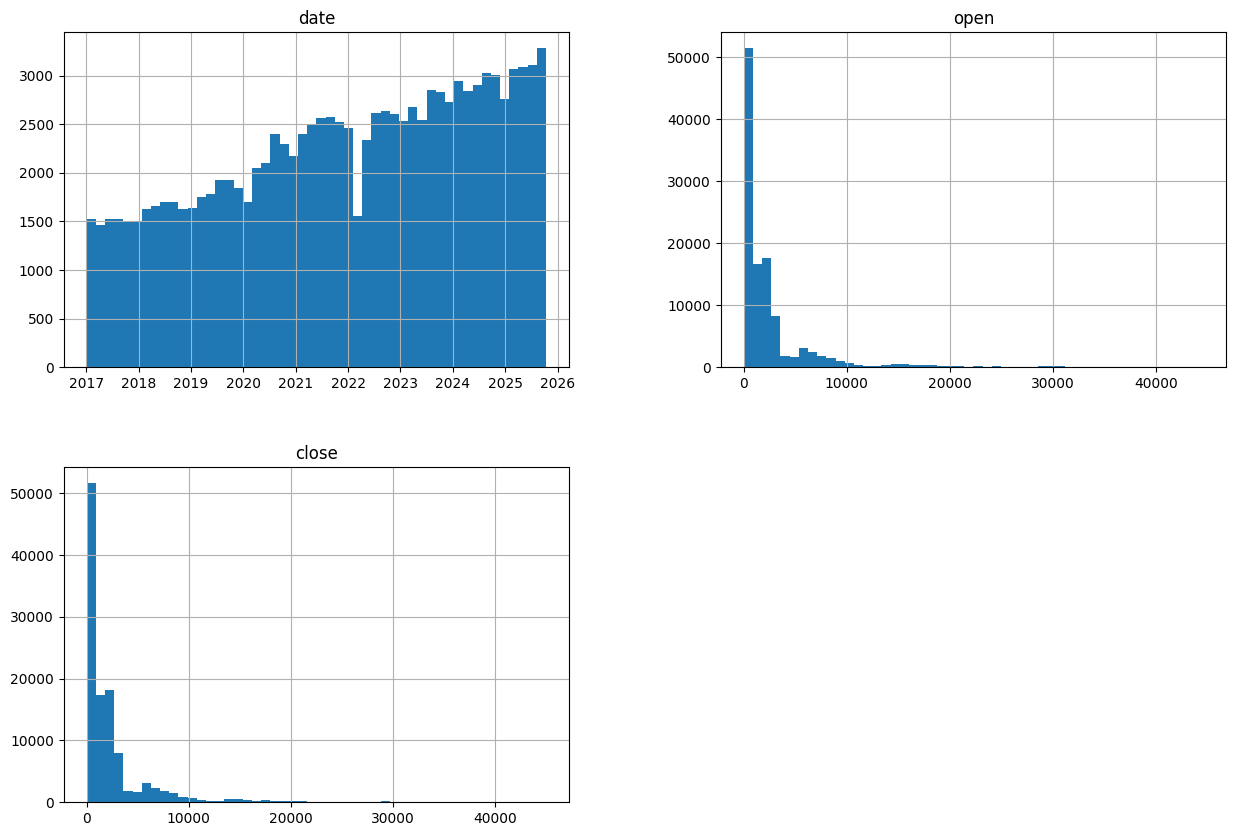

In [19]:
df_plot_indices = df_indices[['date', 'open', 'close']].copy()

df_plot_indices.hist(bins=50, figsize=(15,10))
plt.show()

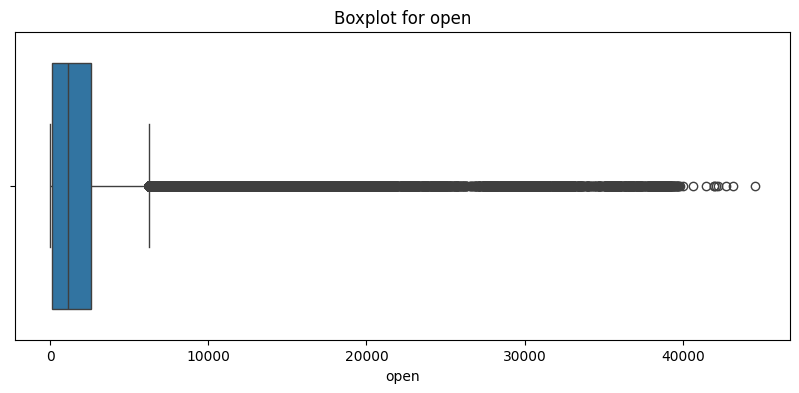

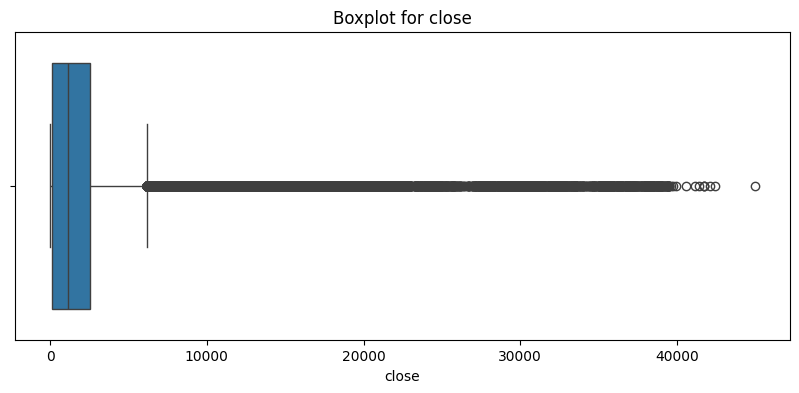

In [21]:
for col in df_indices.select_dtypes(include="number").columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df_indices[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

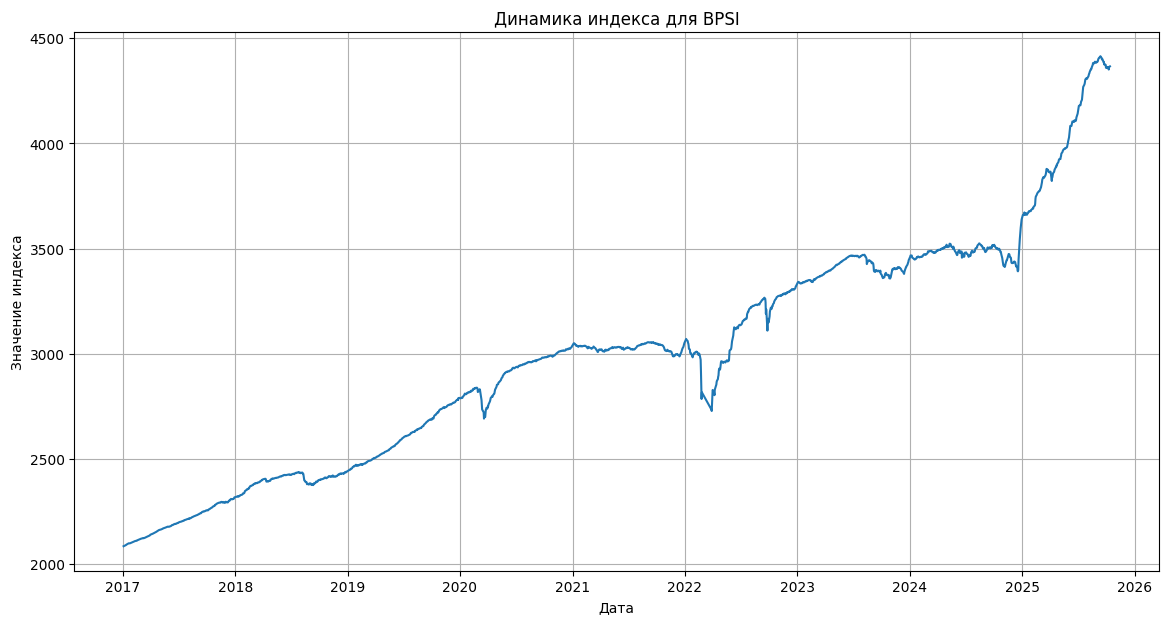

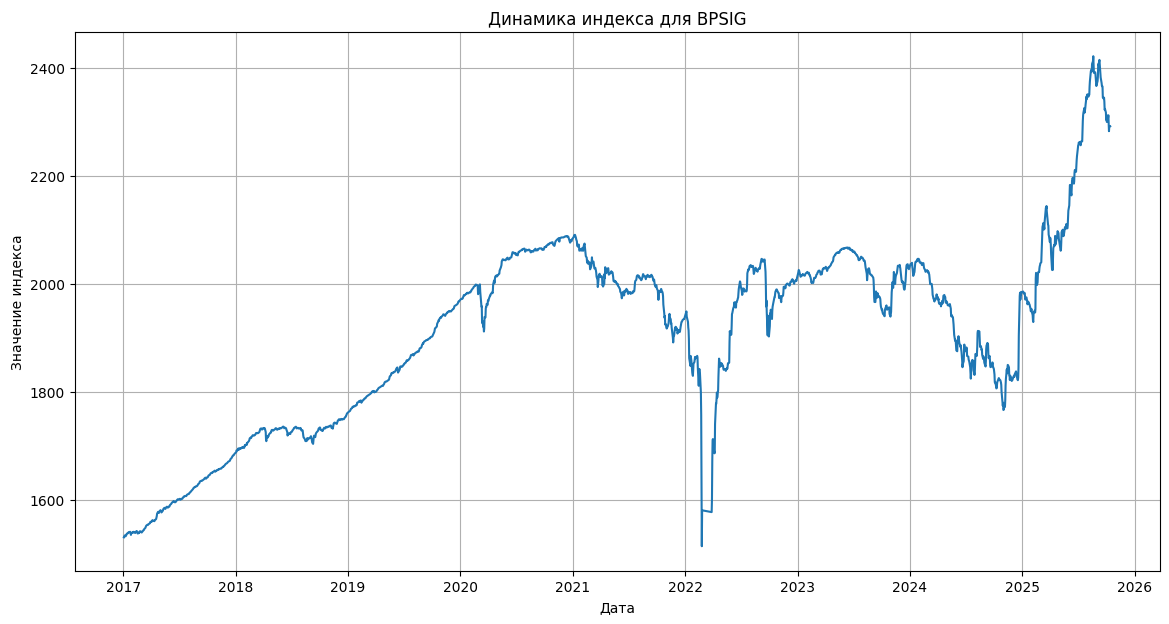

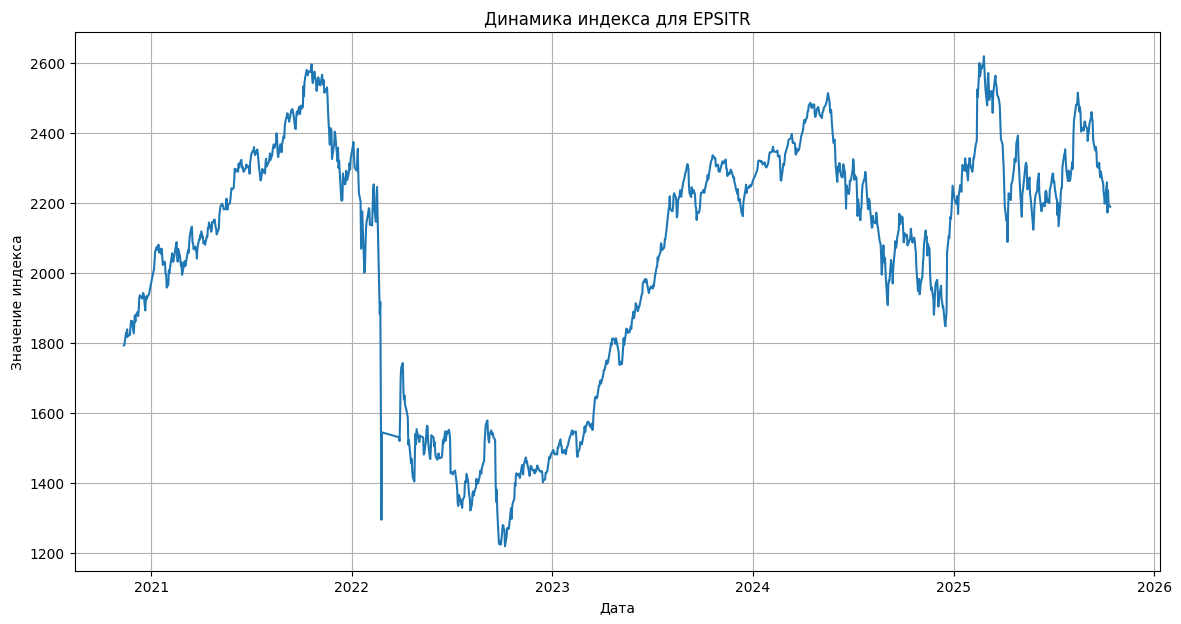

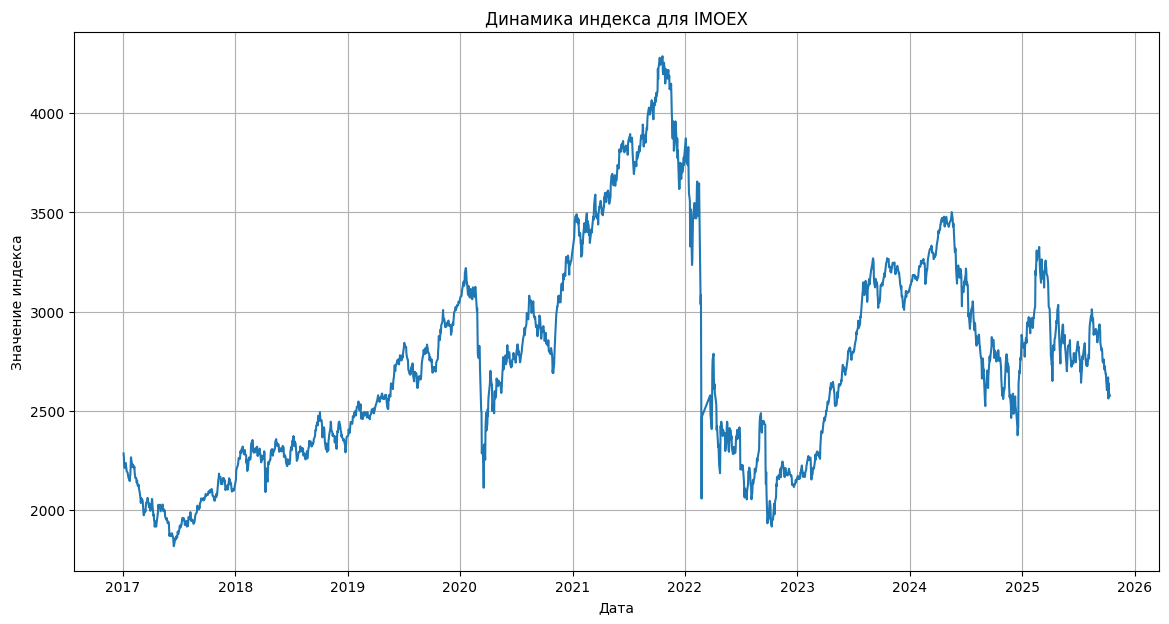

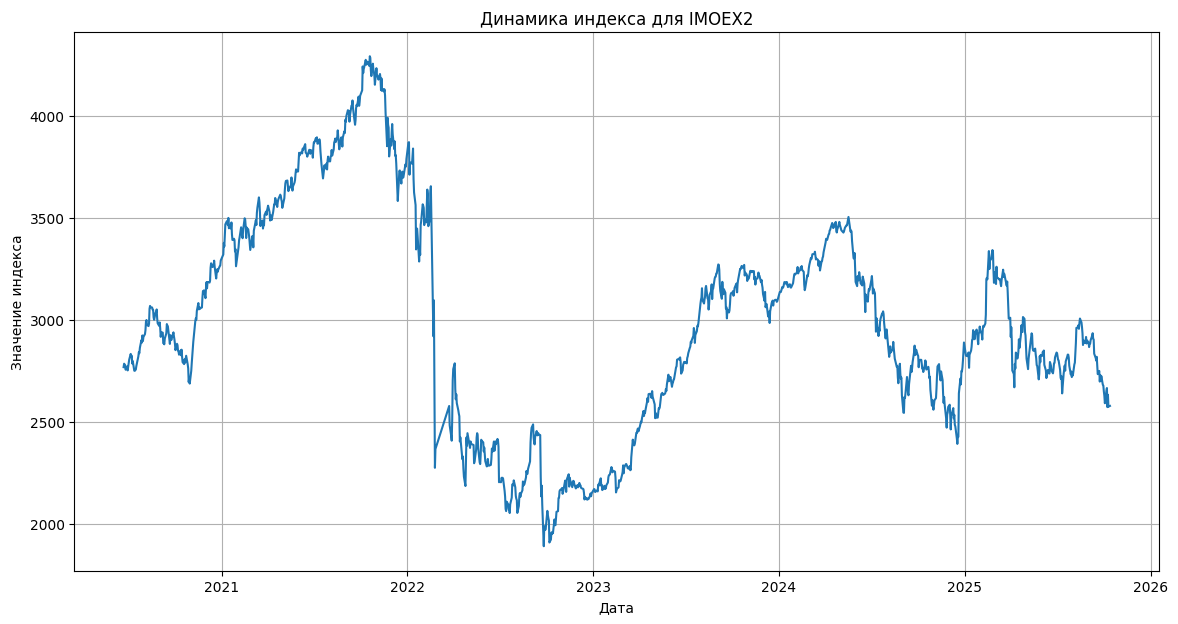

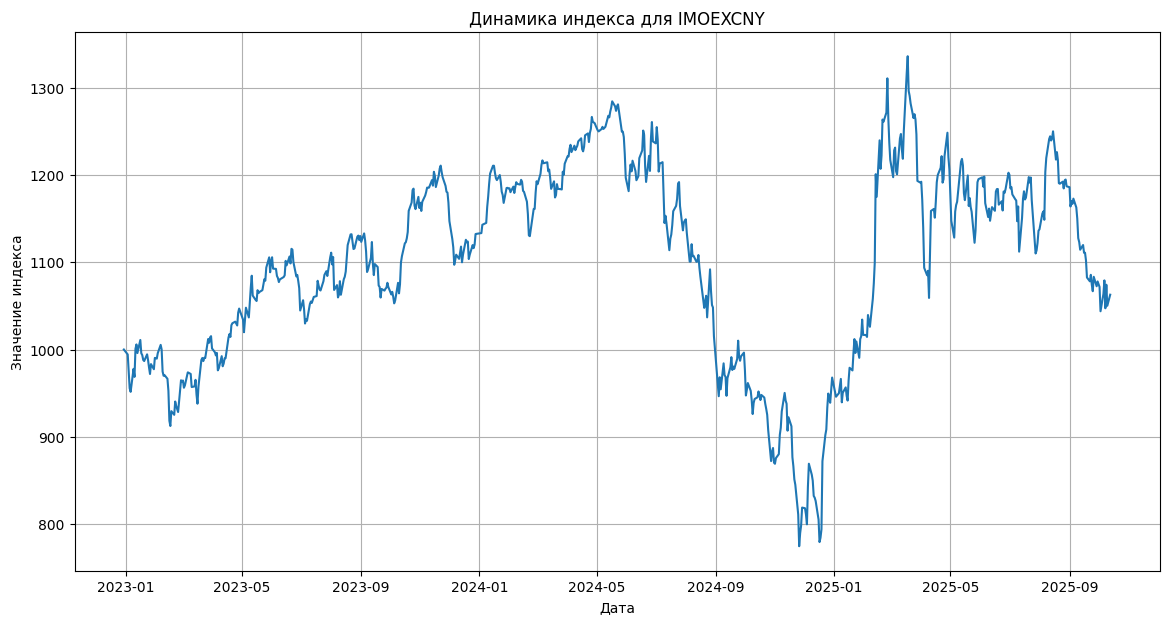

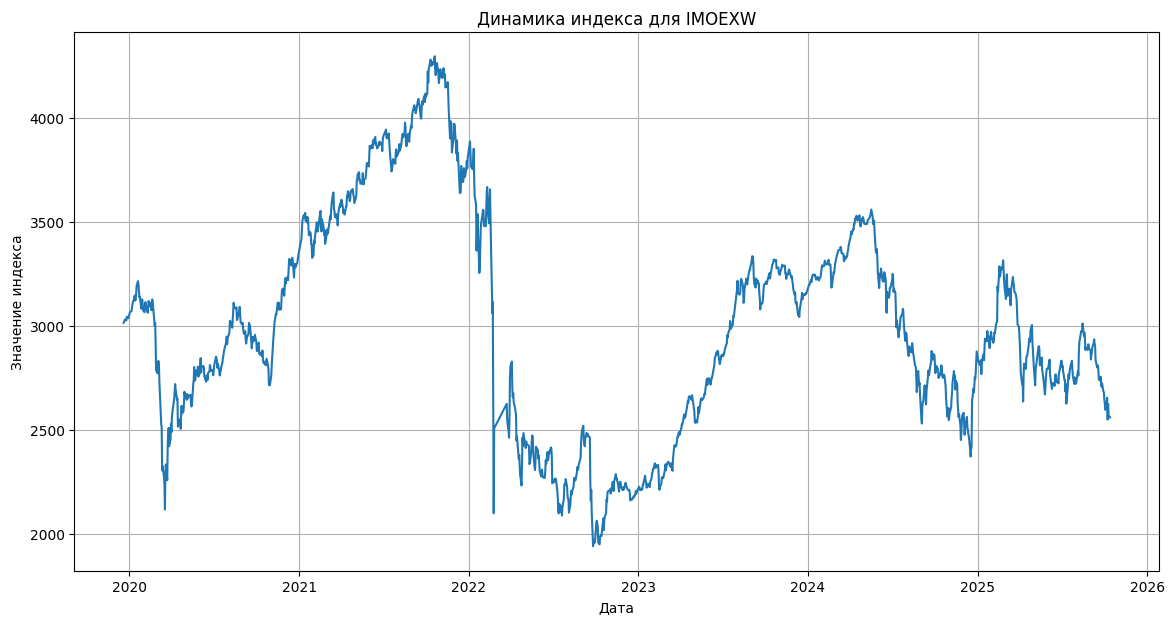

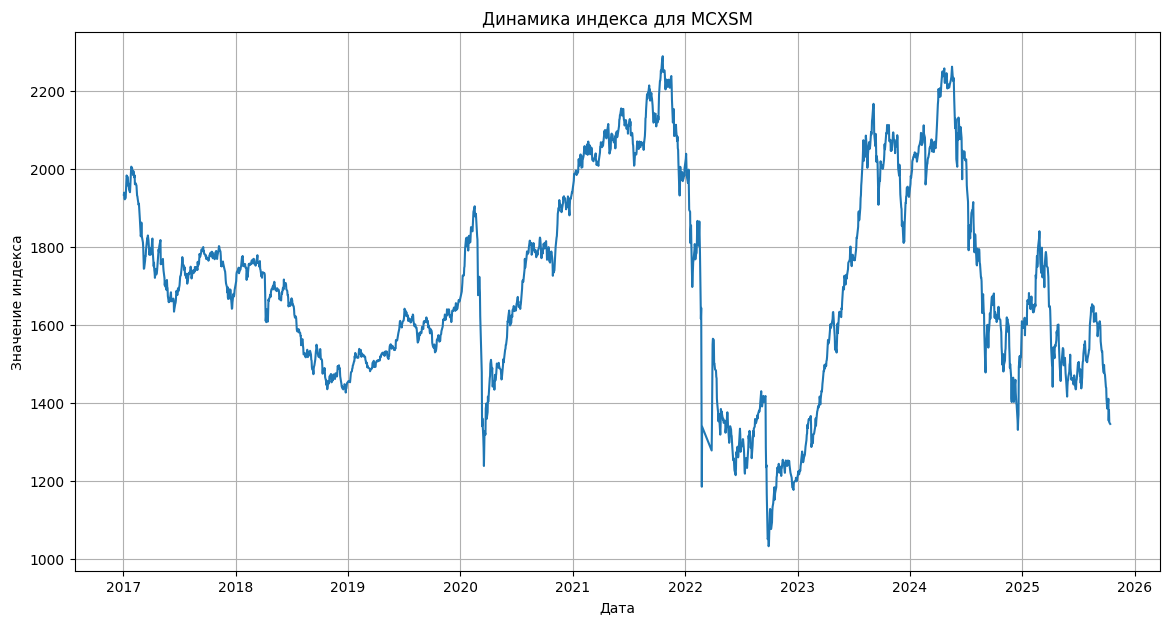

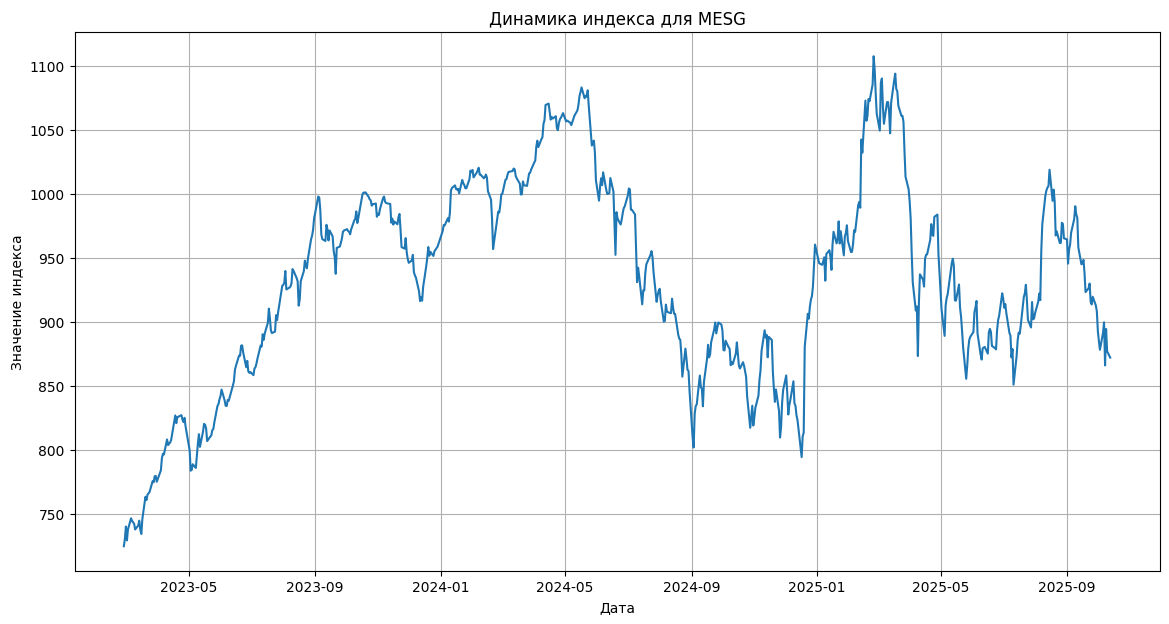

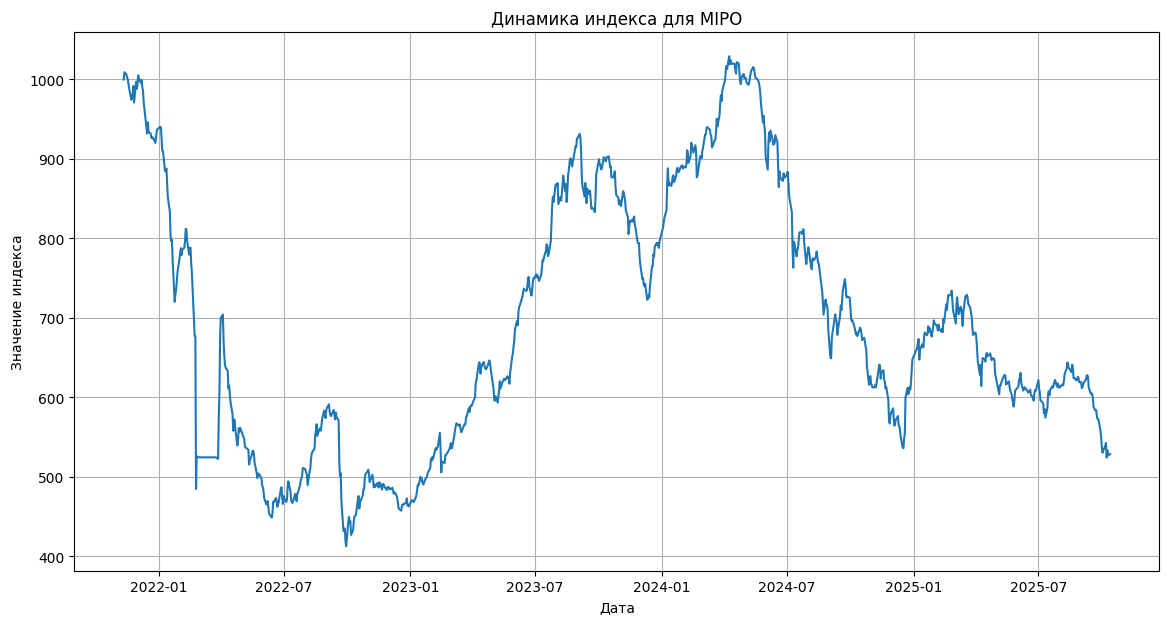

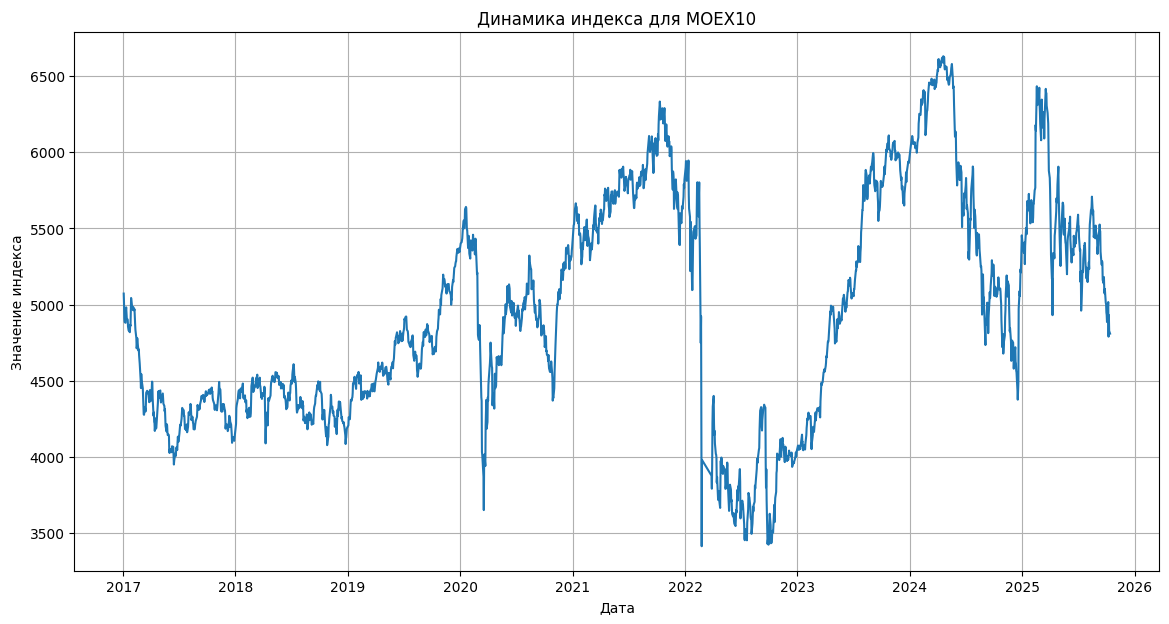

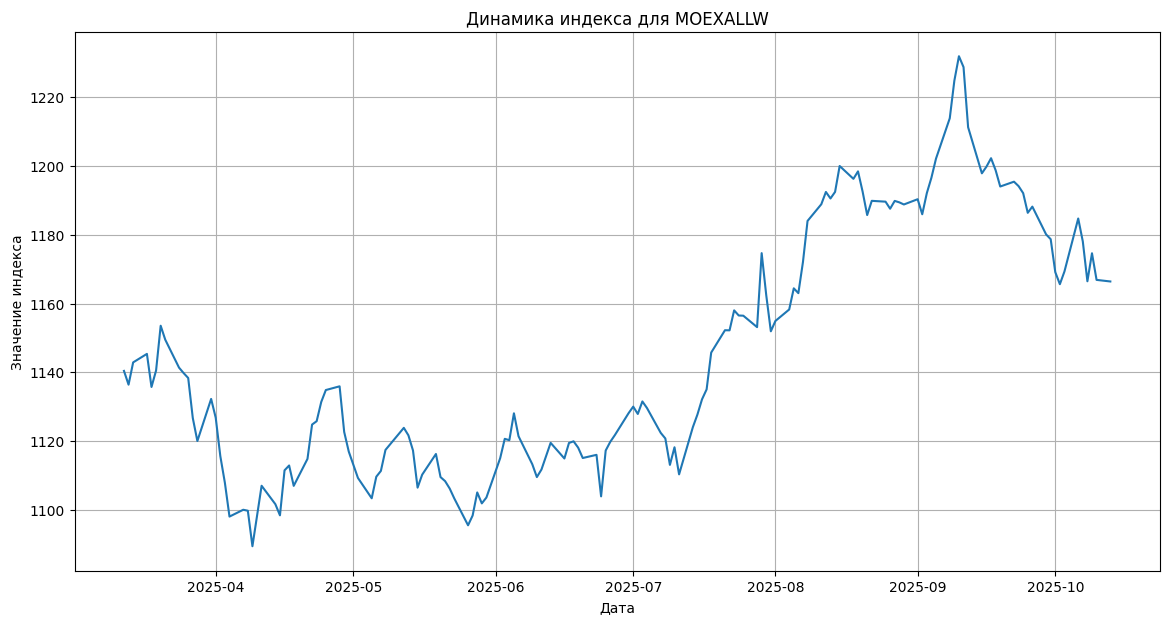

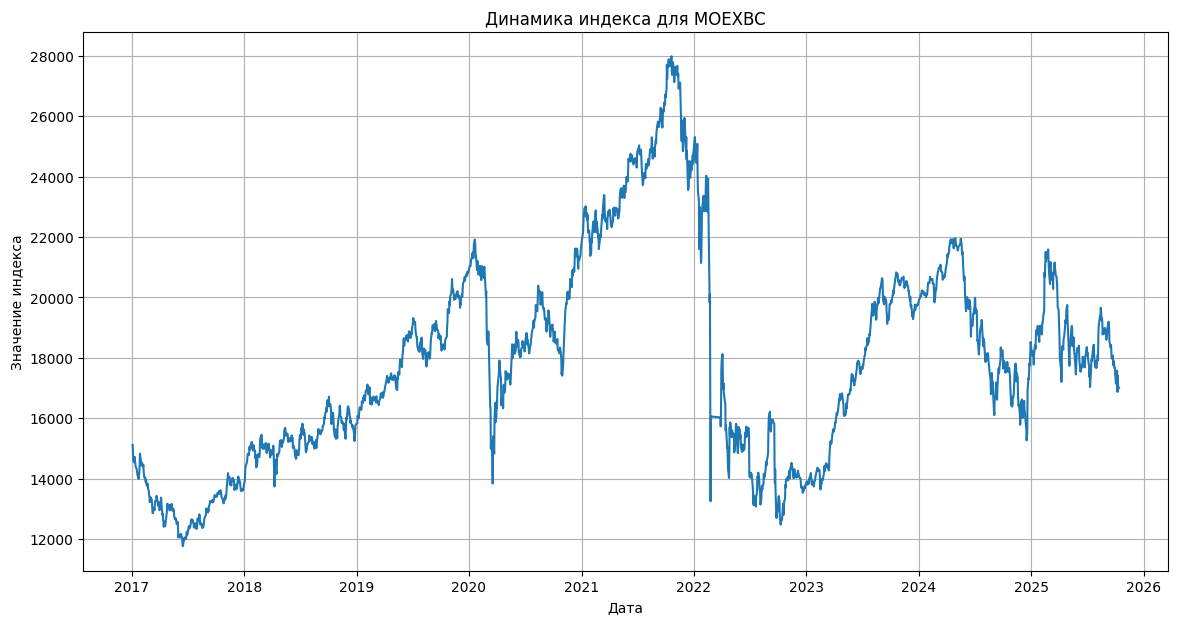

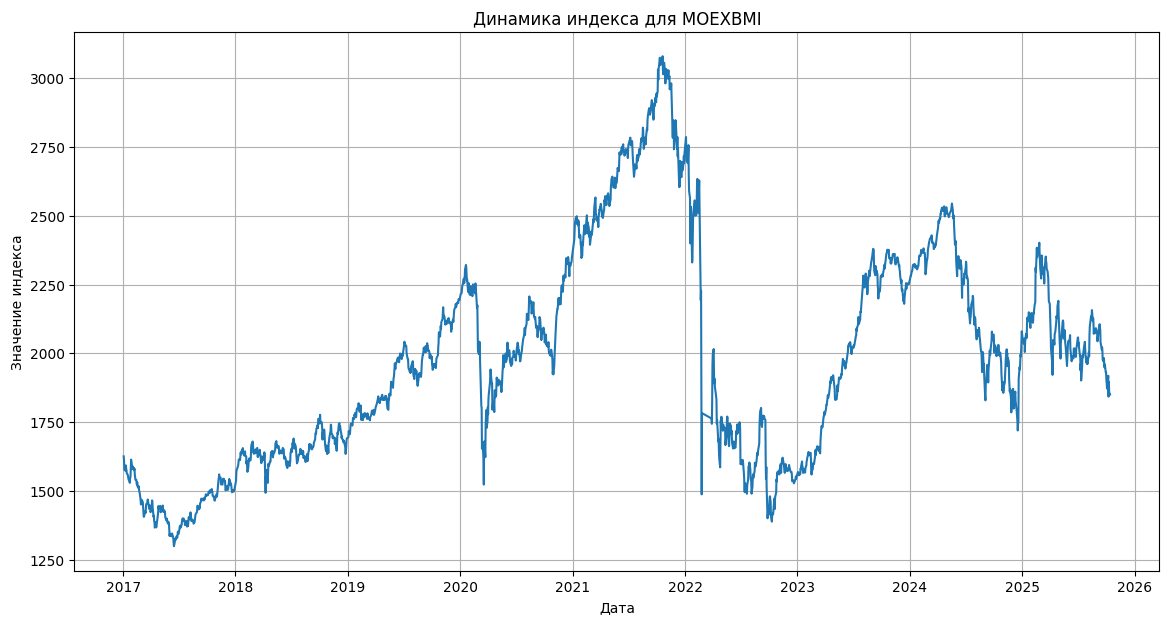

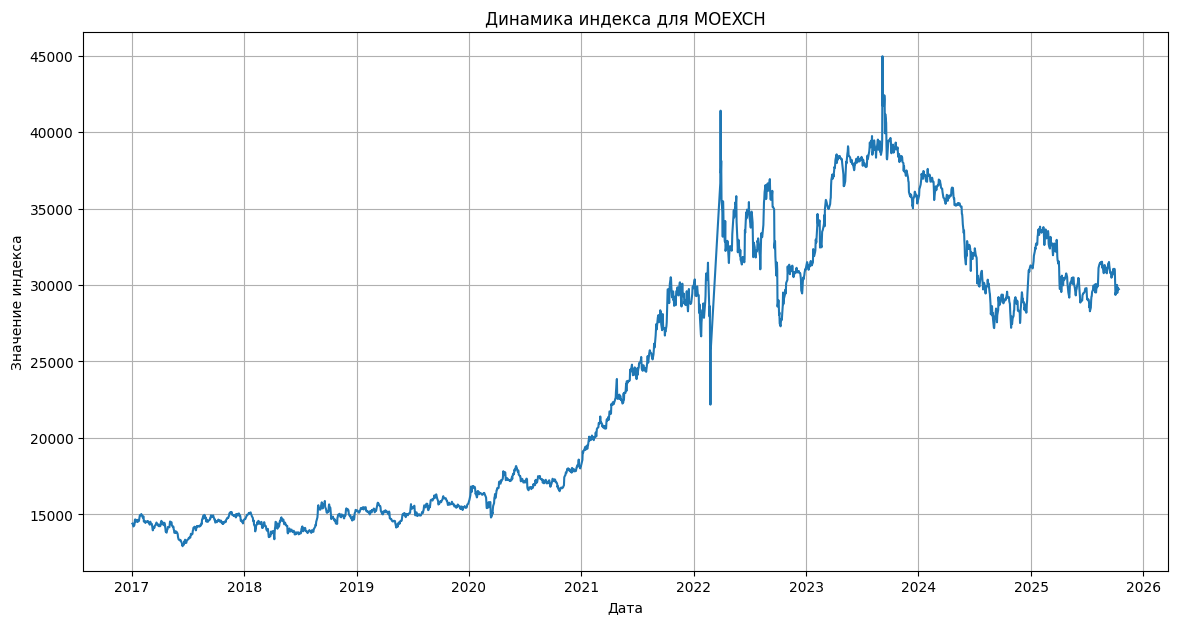

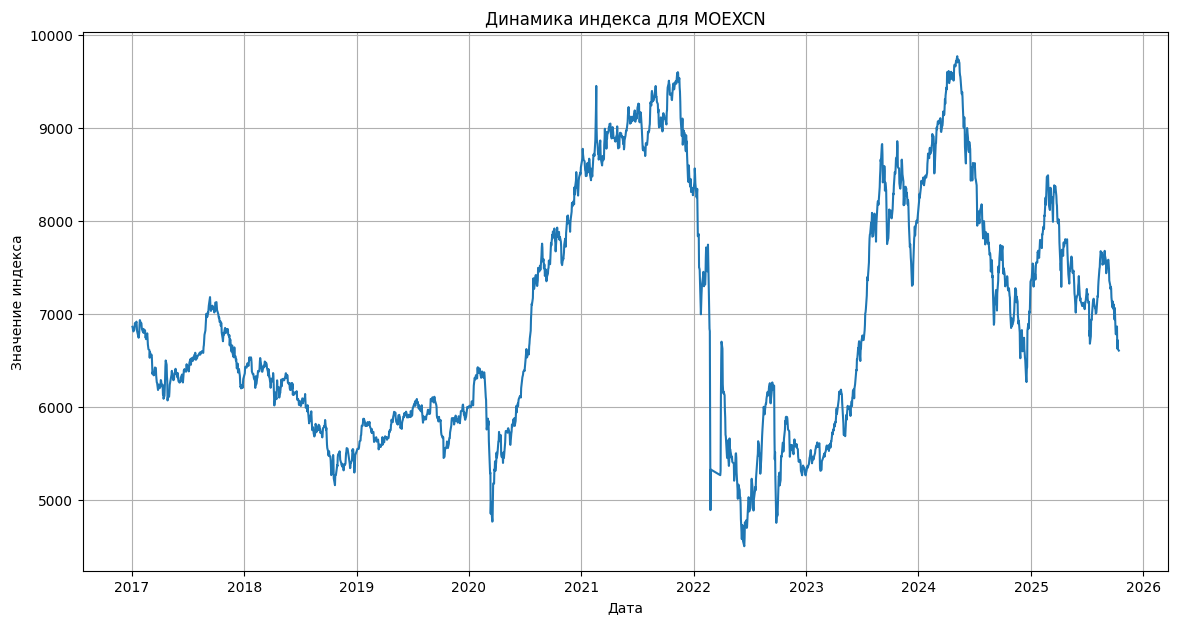

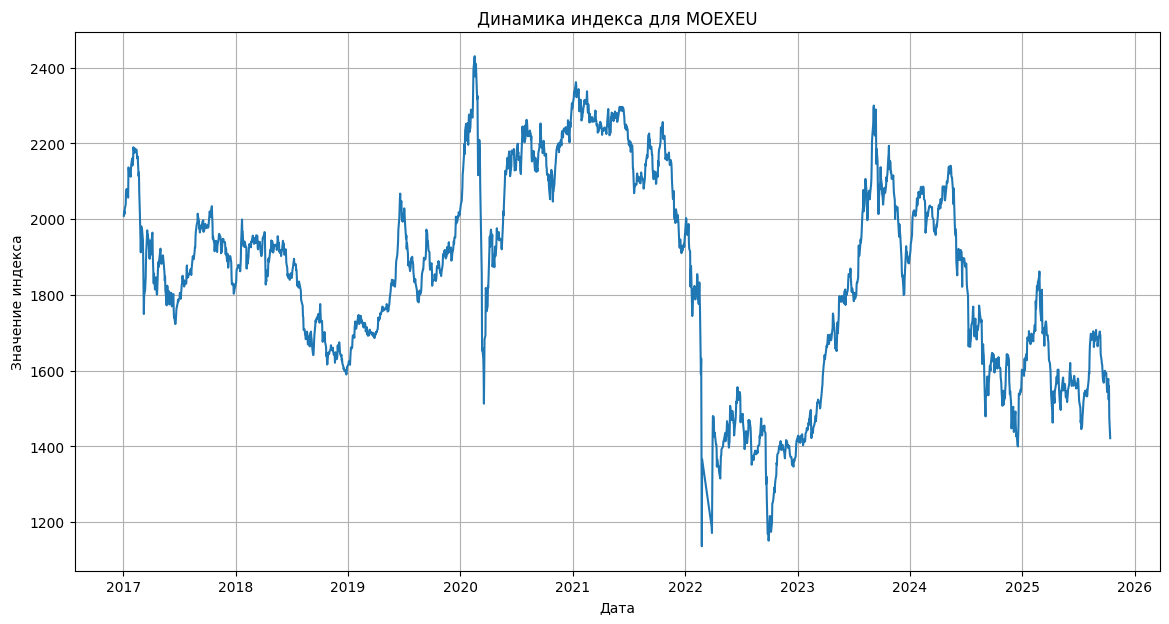

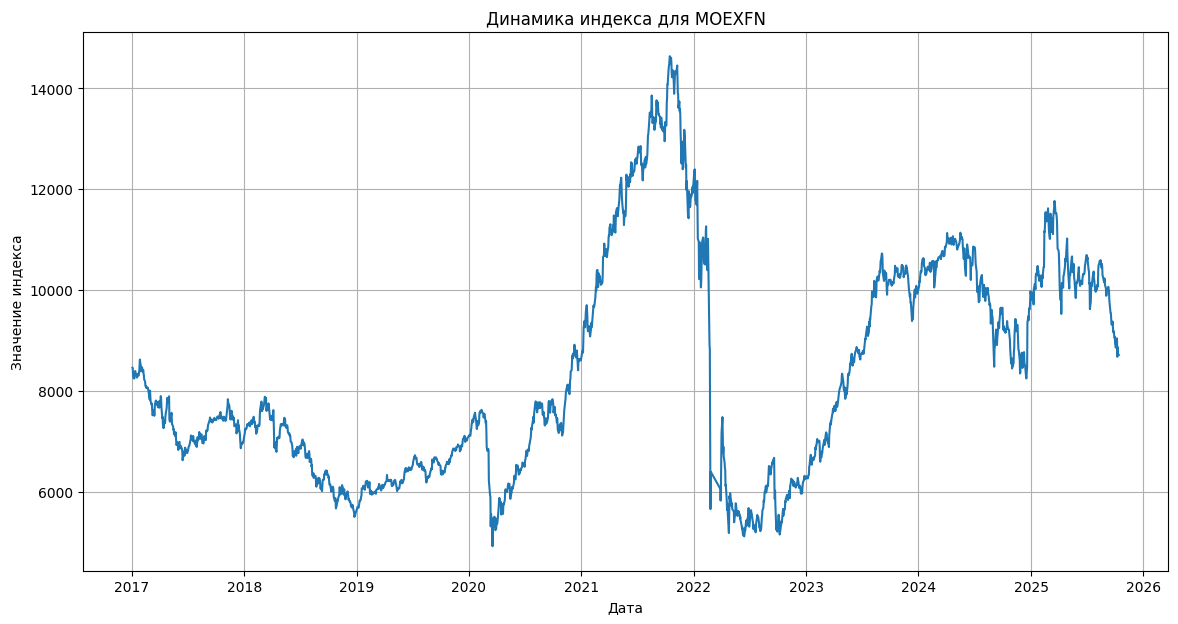

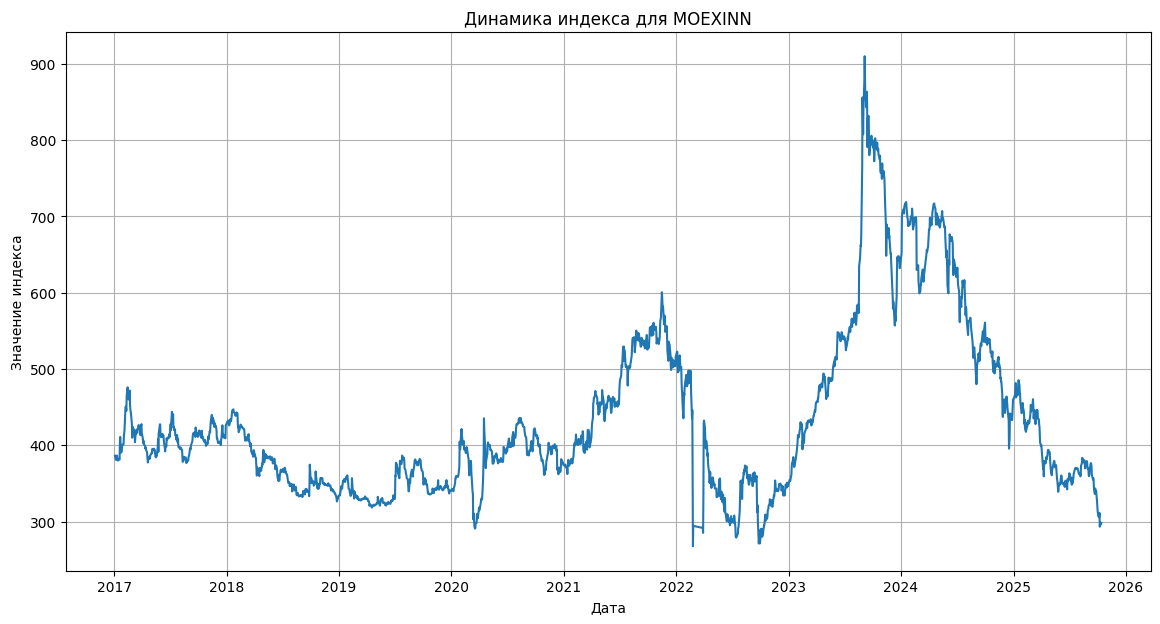

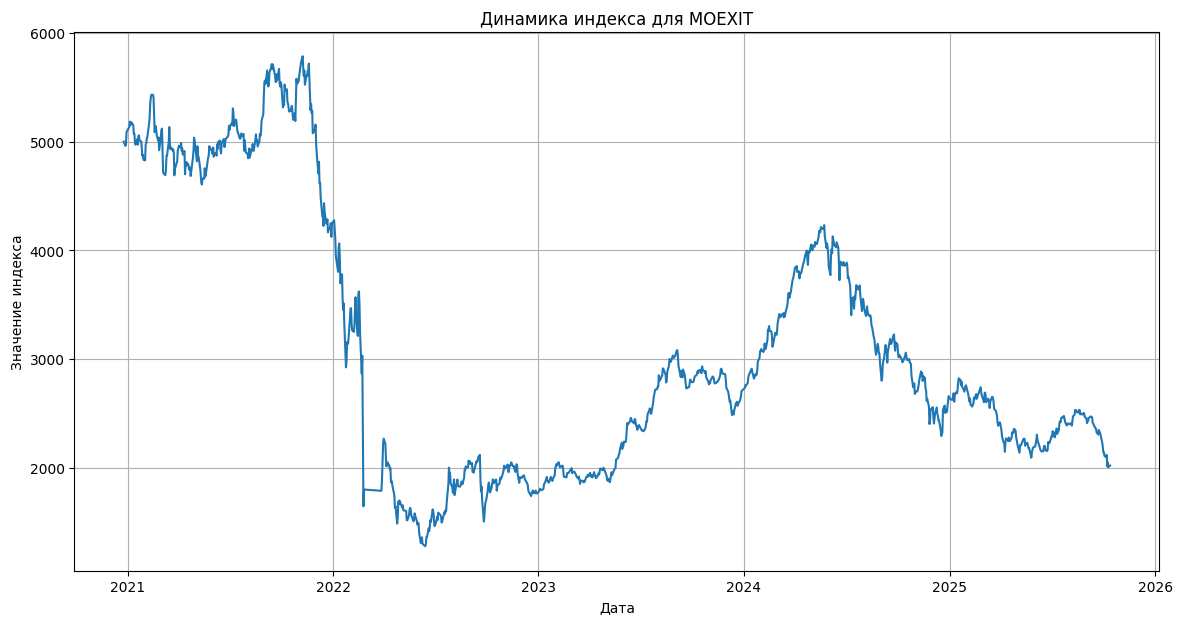

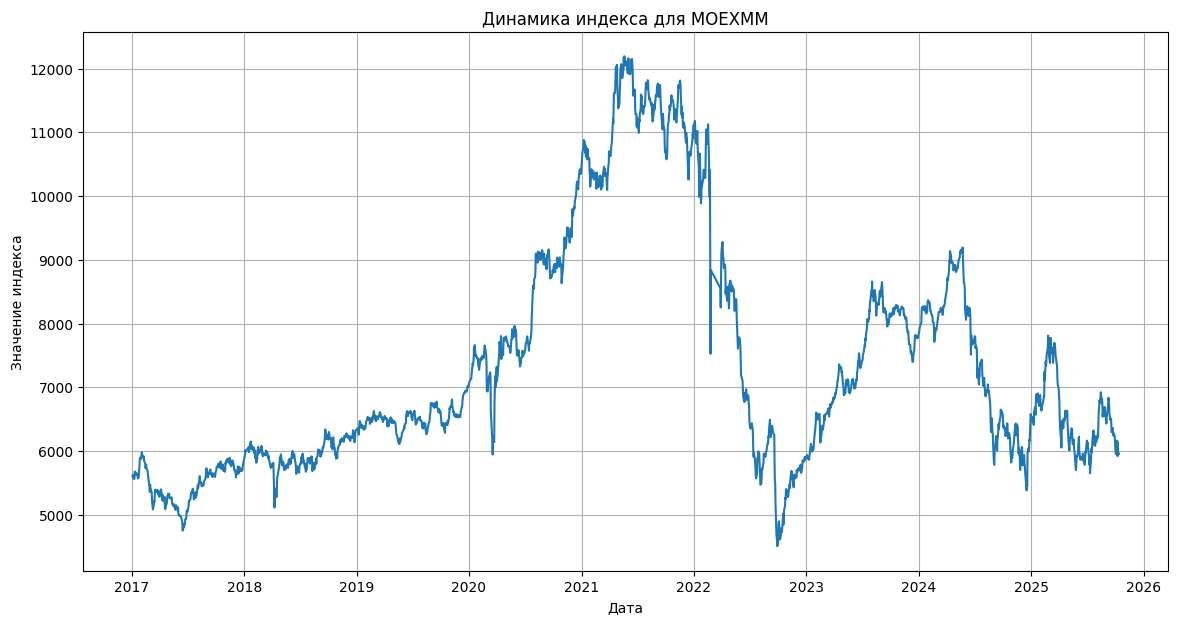

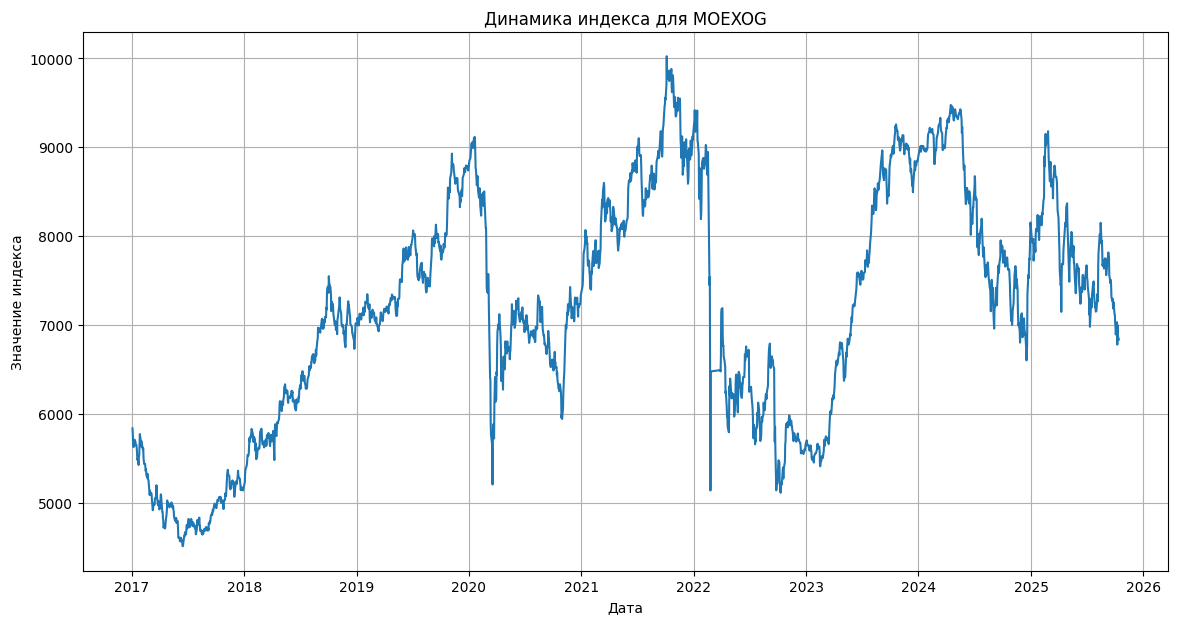

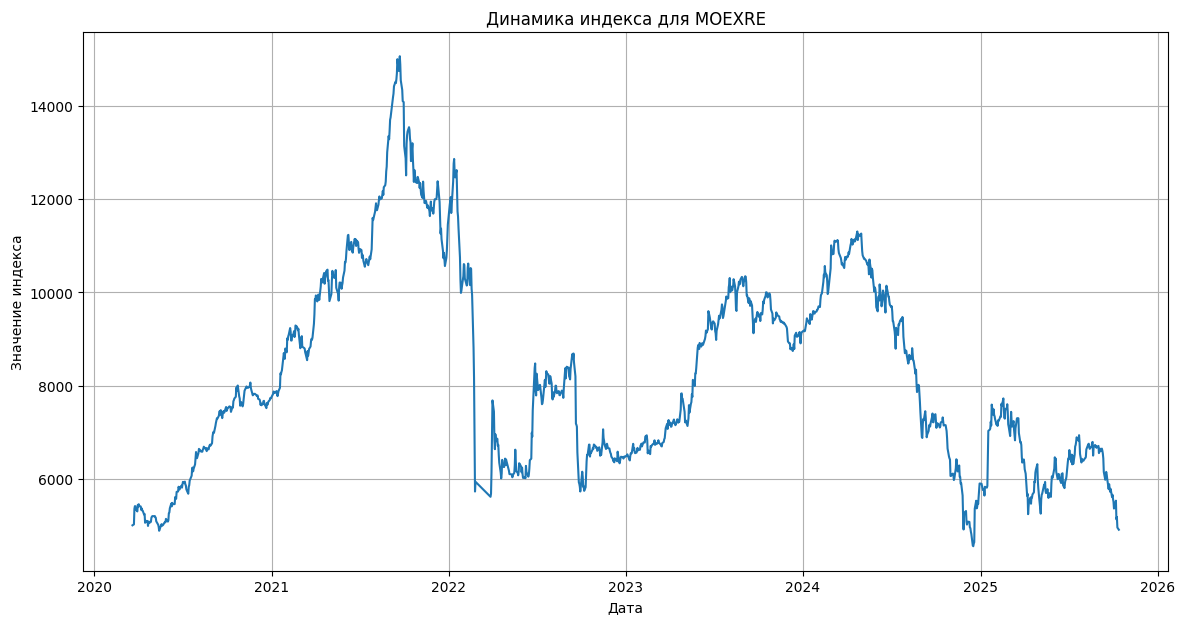

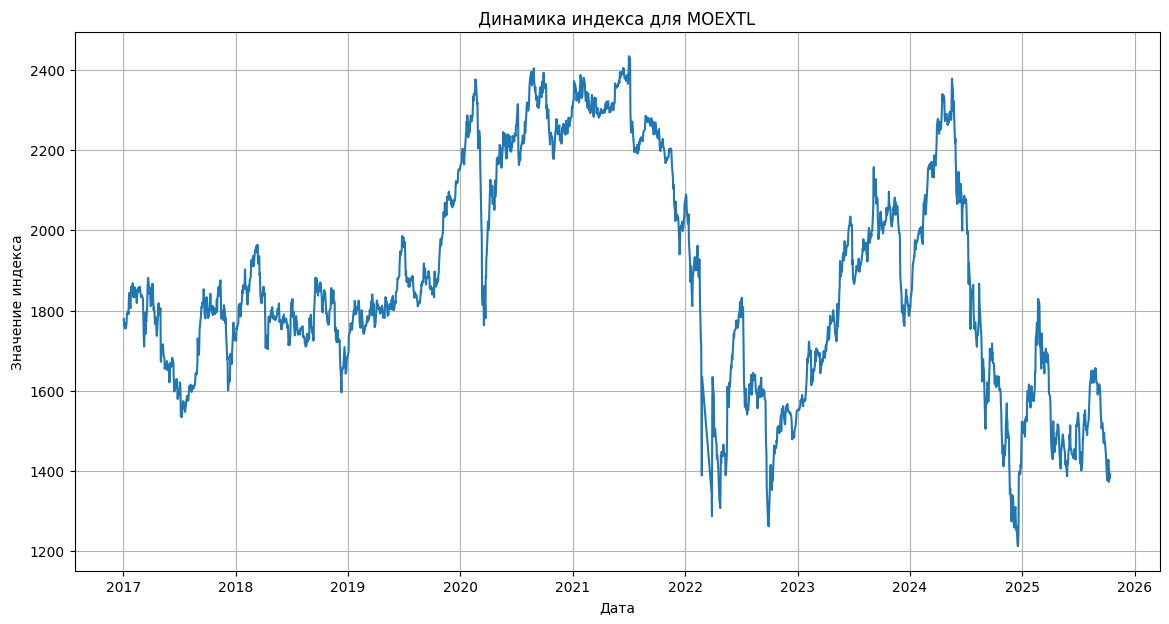

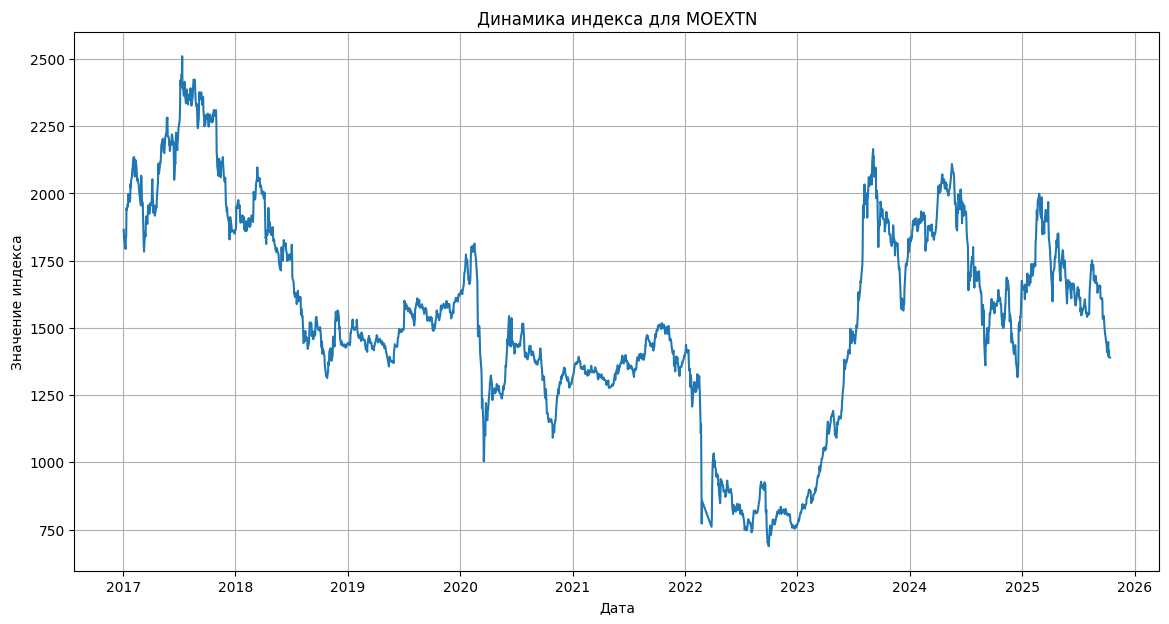

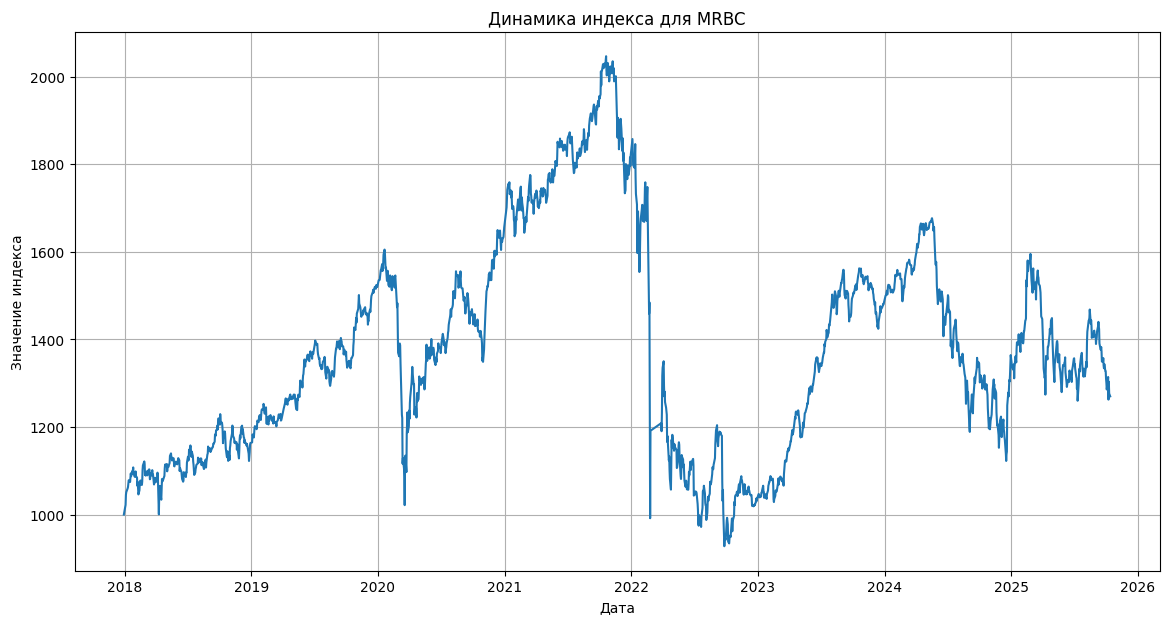

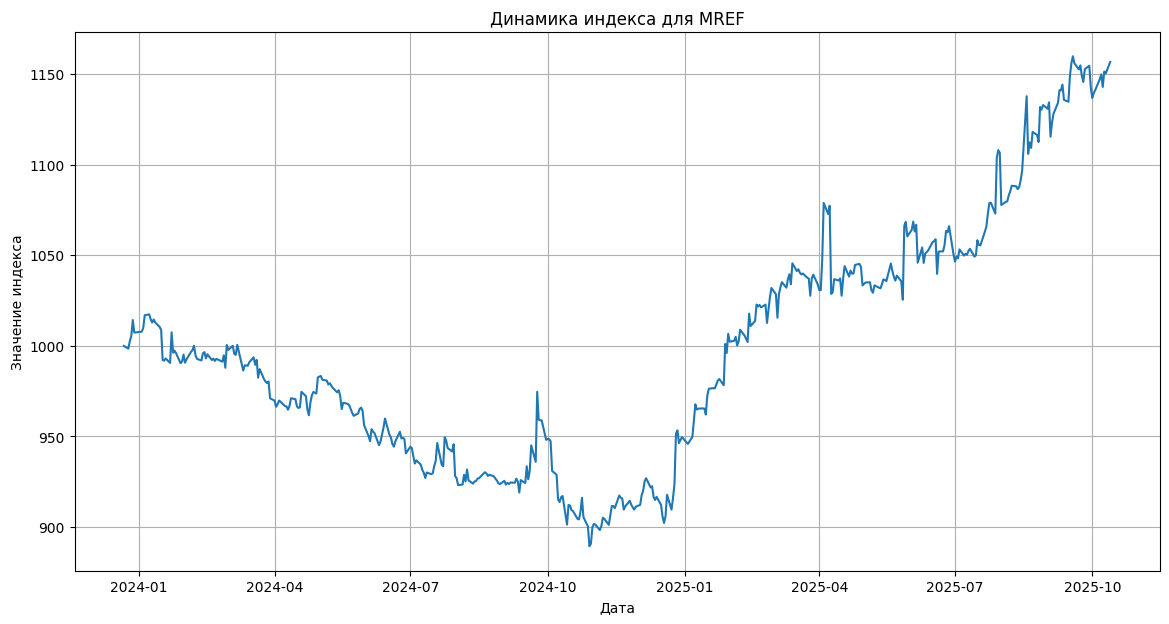

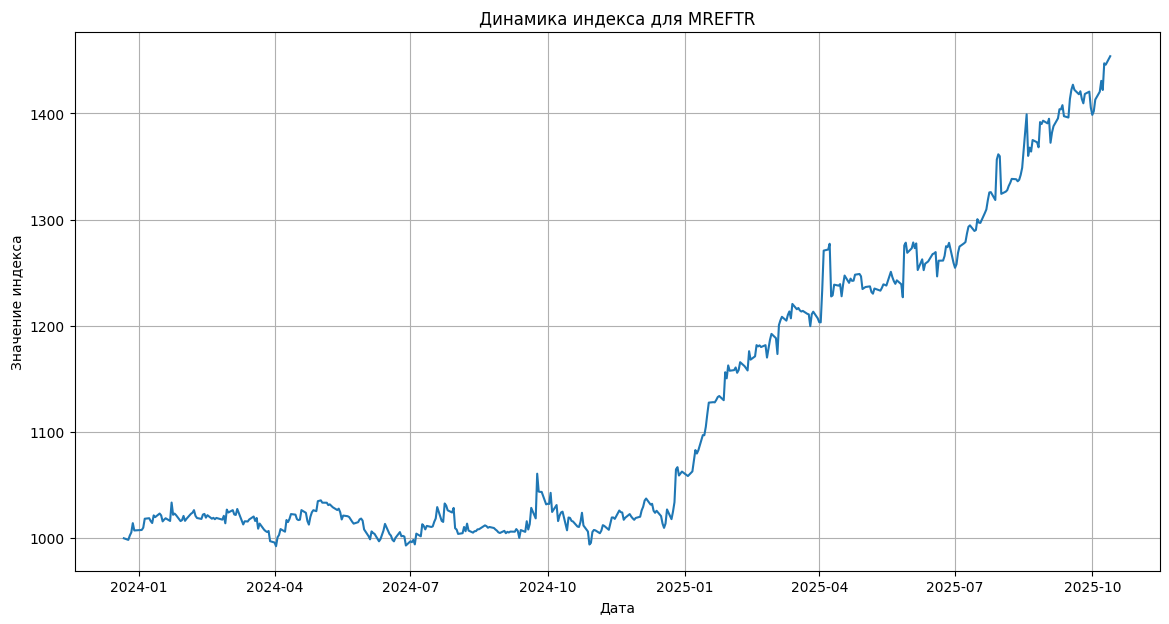

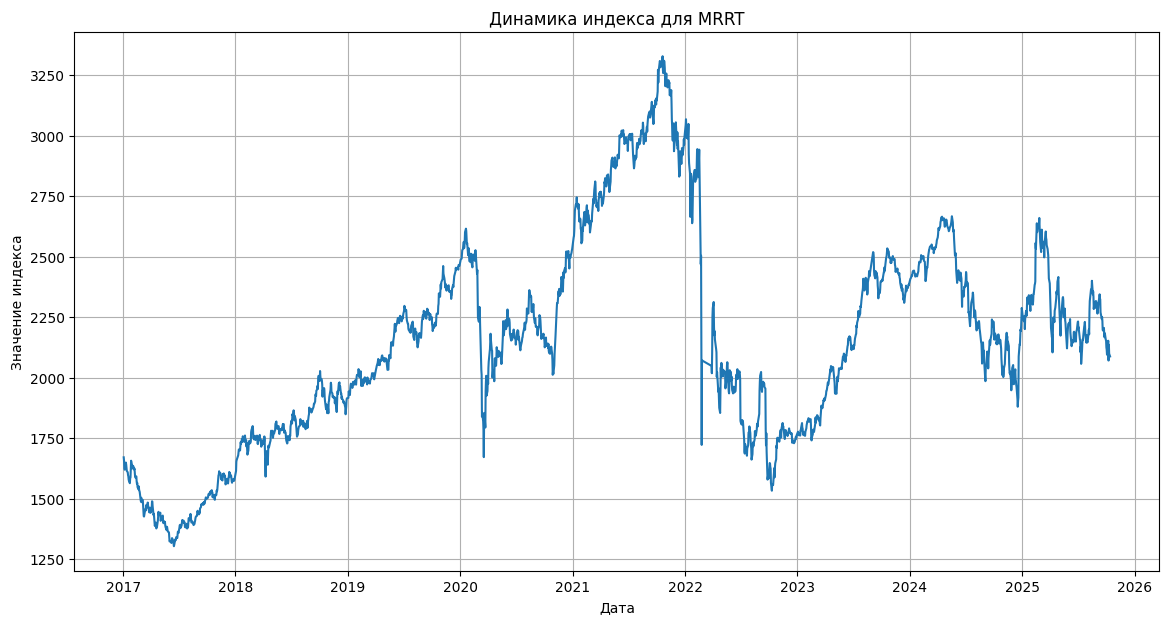

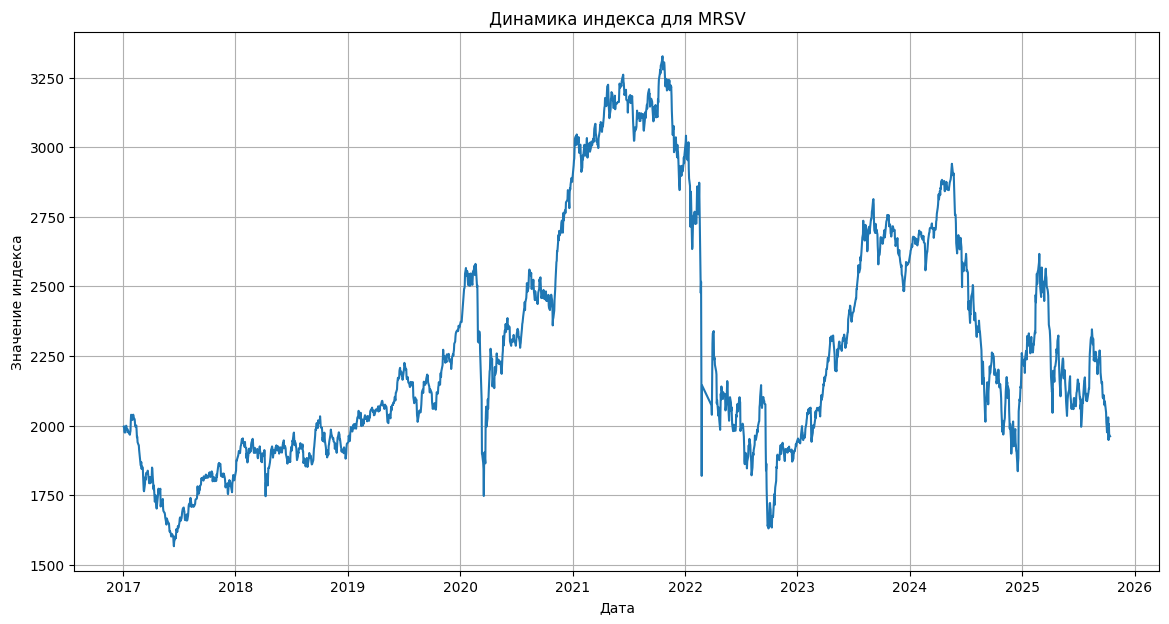

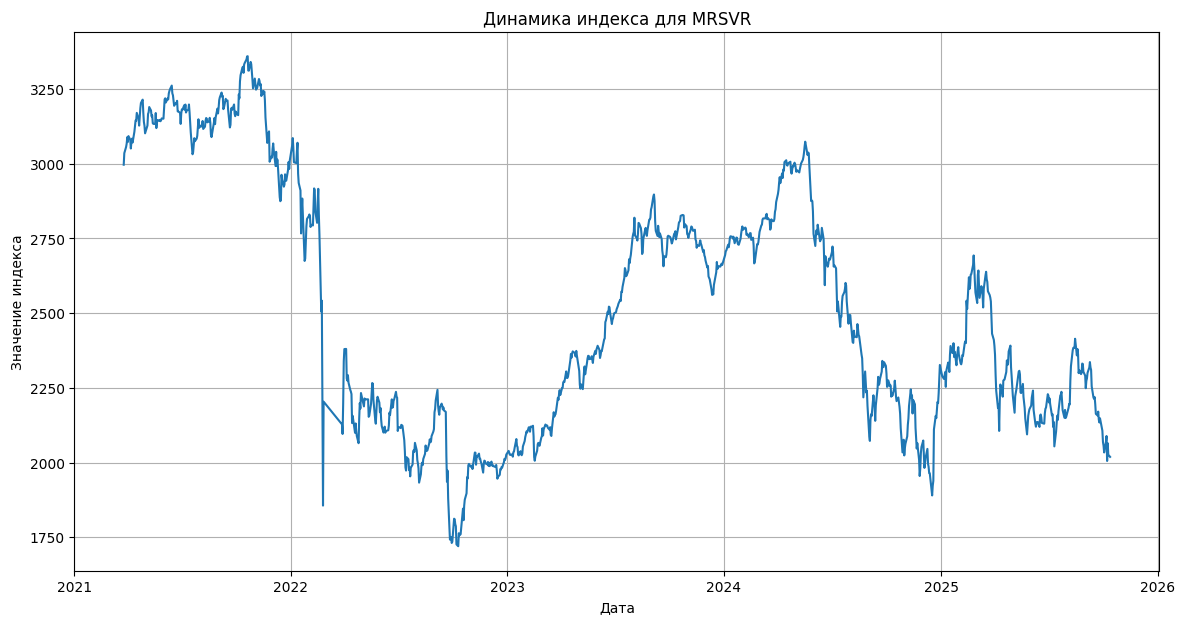

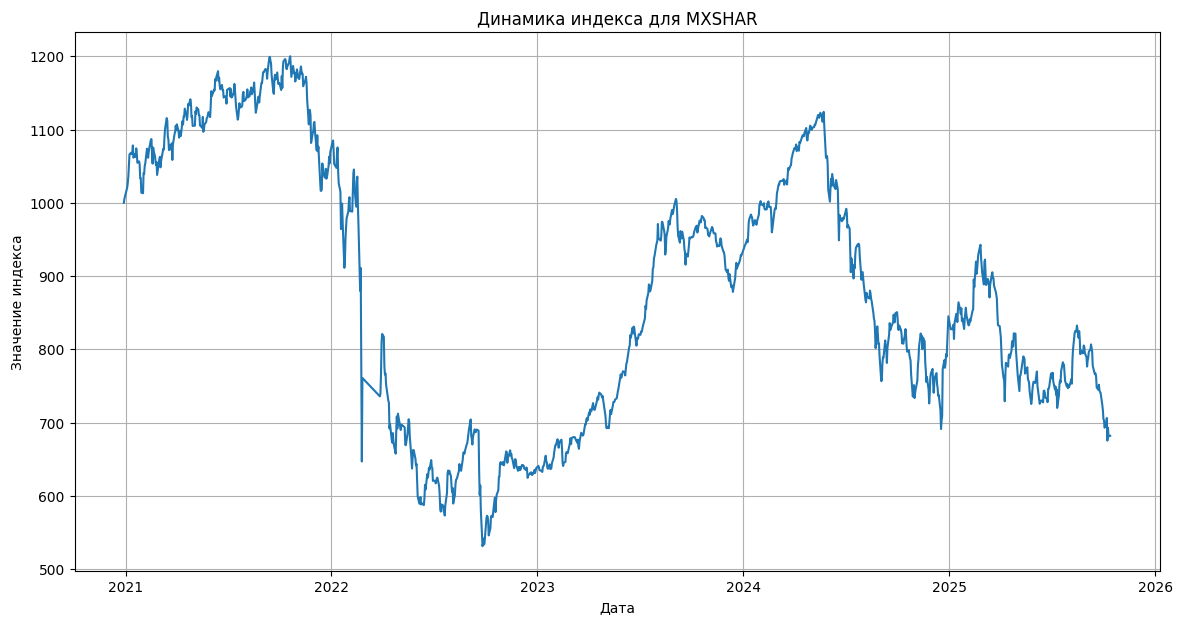

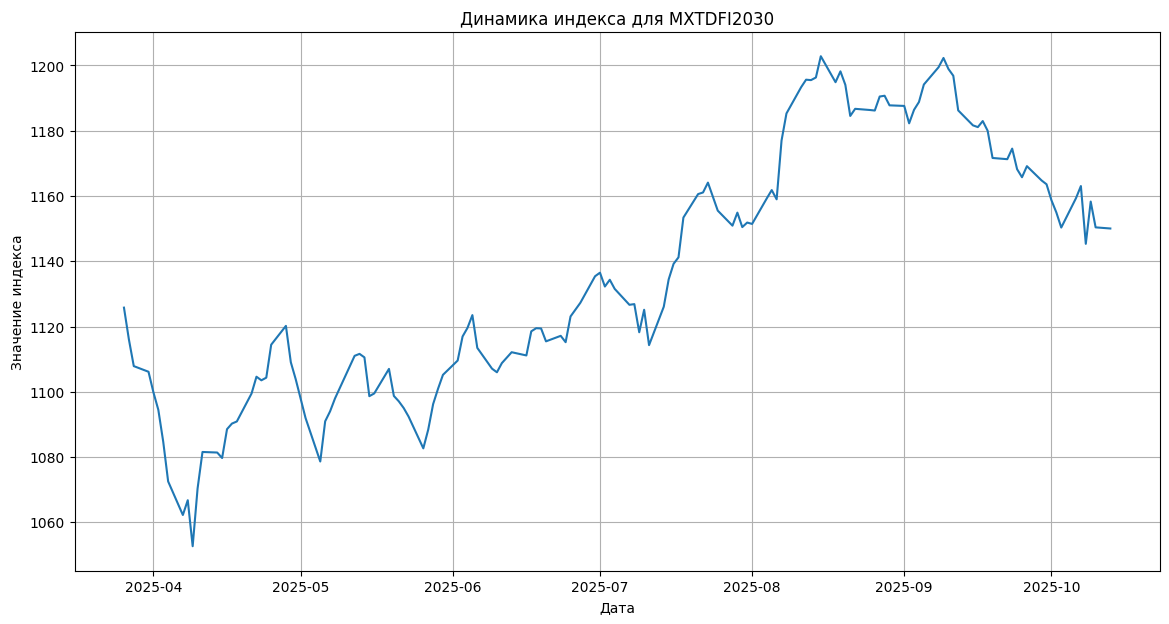

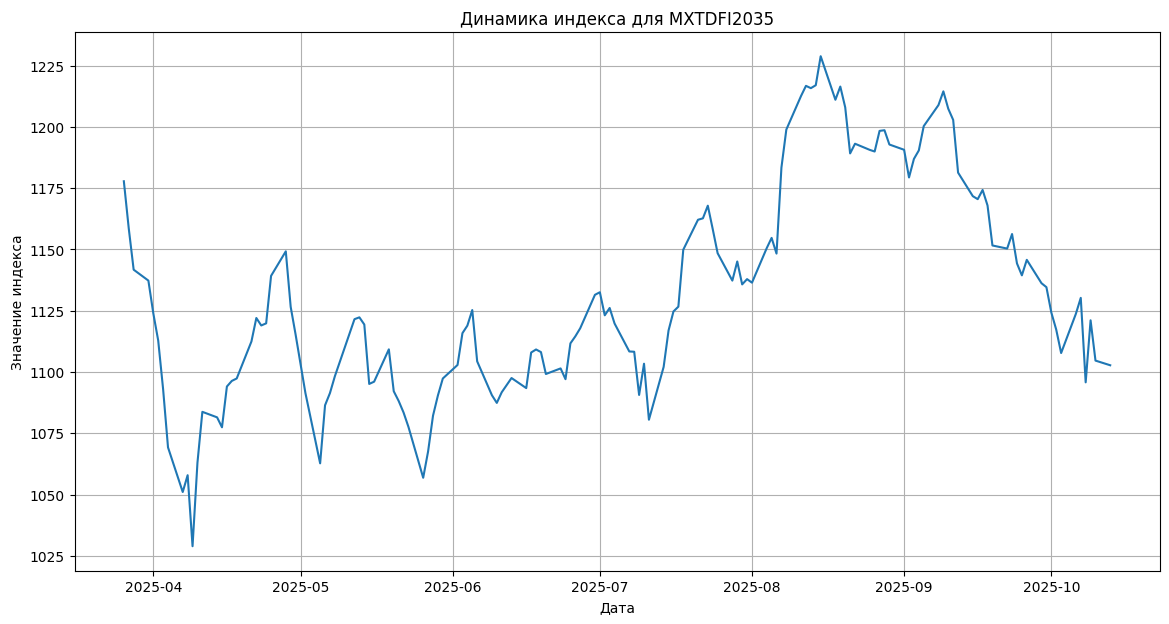

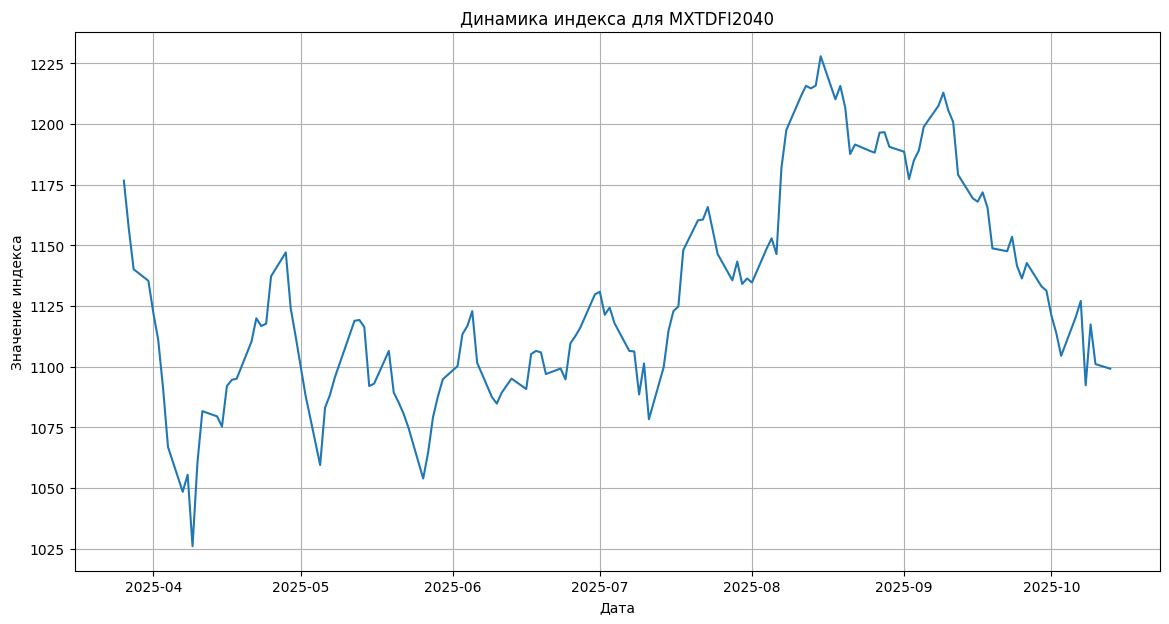

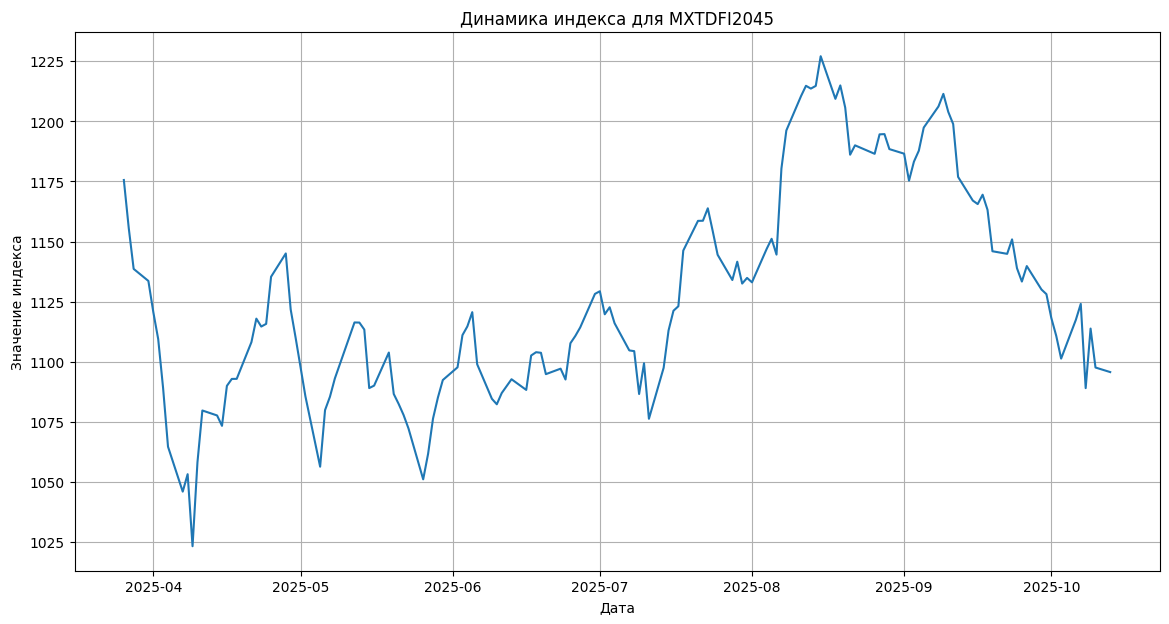

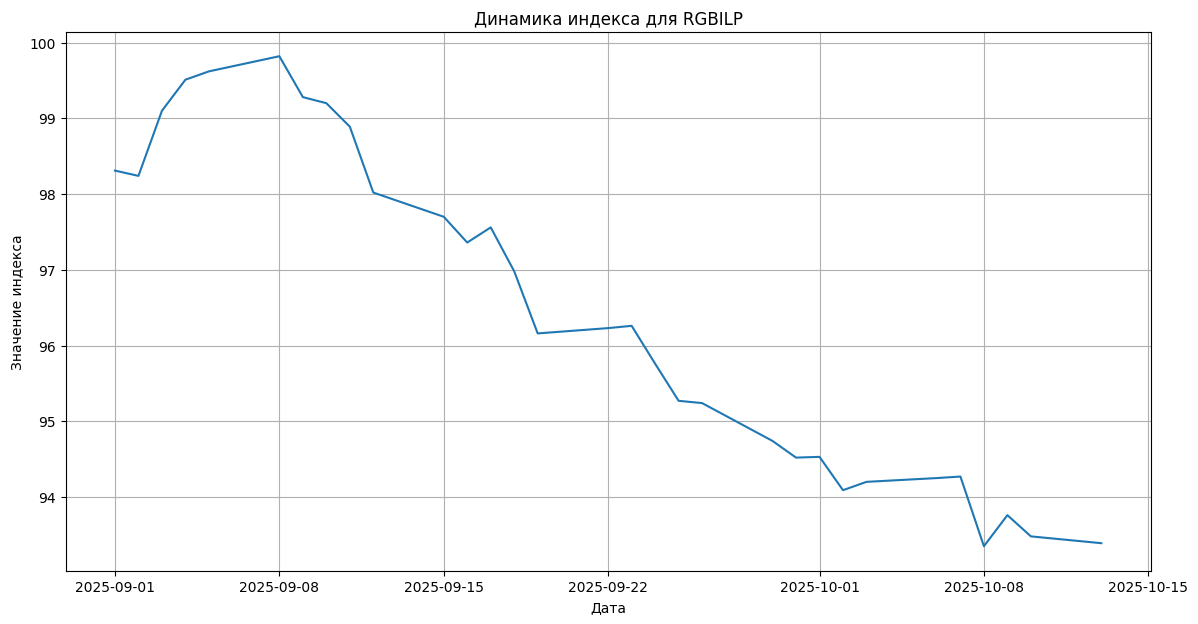

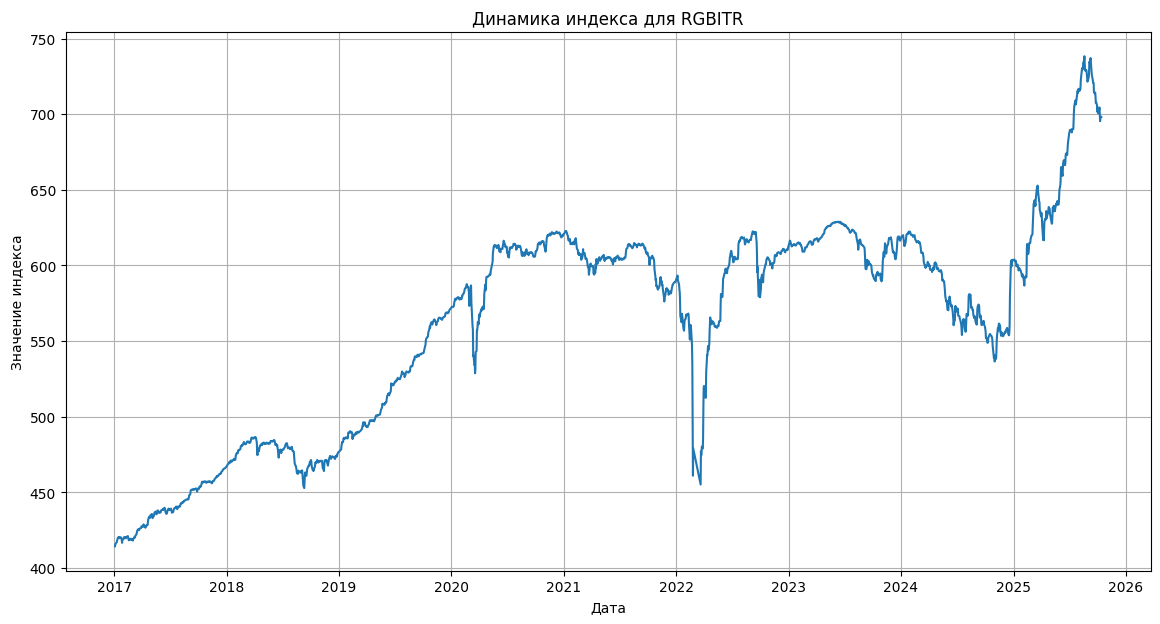

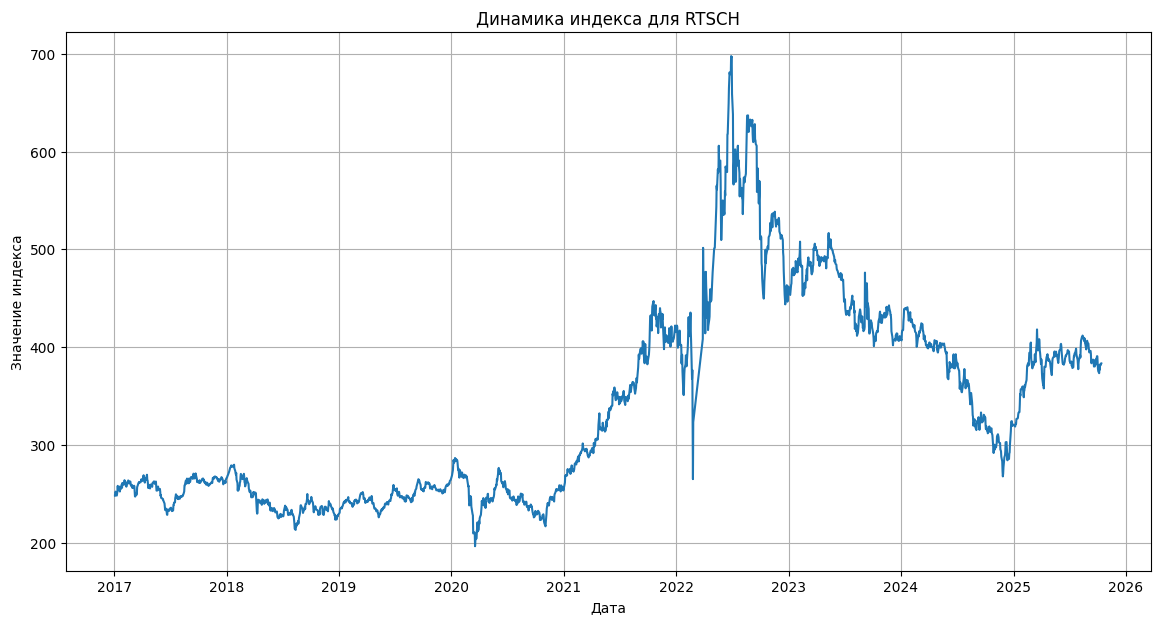

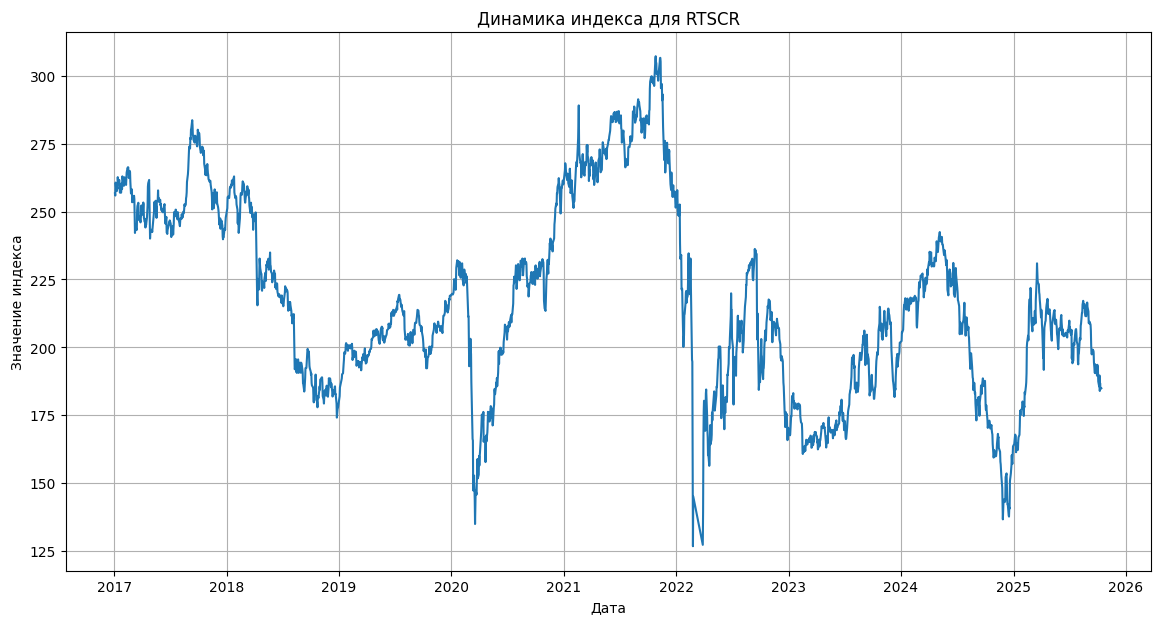

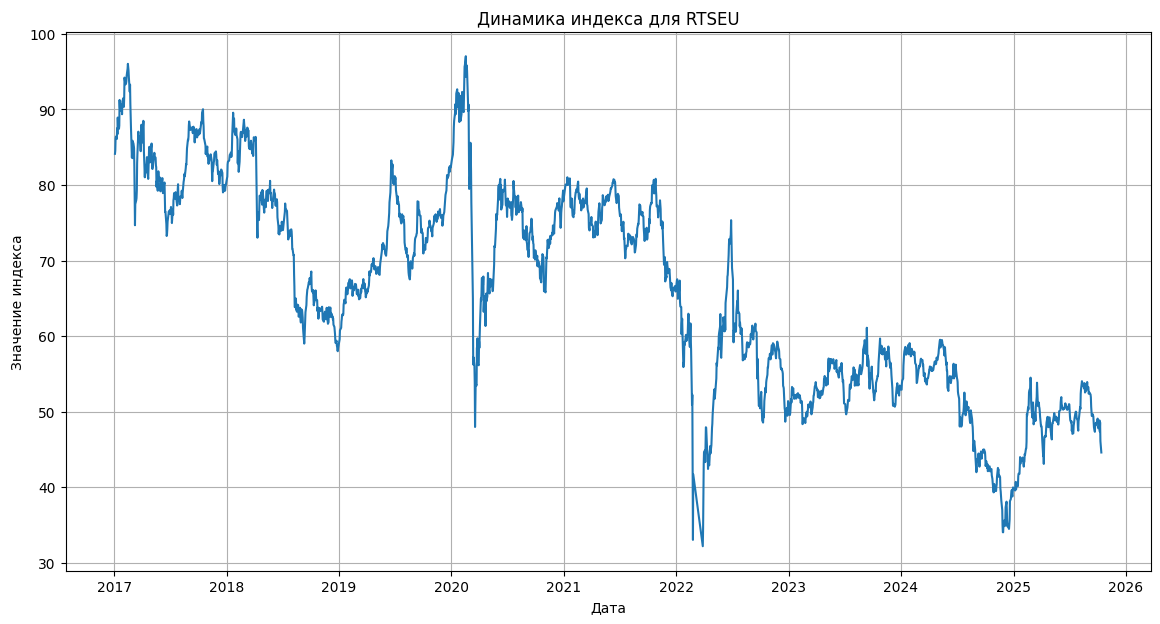

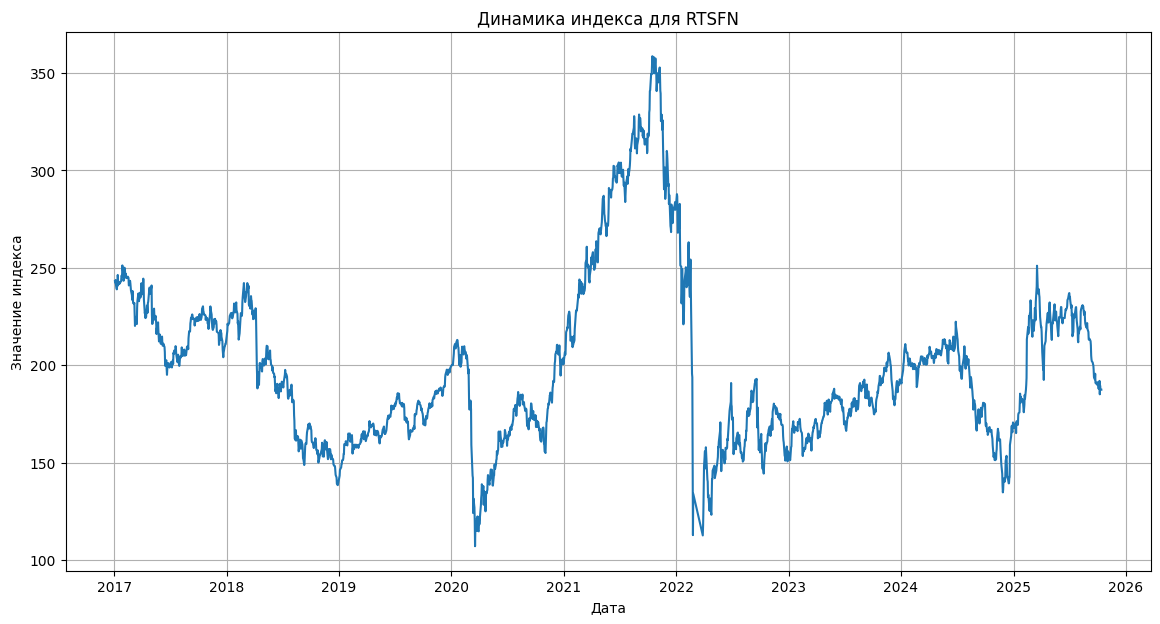

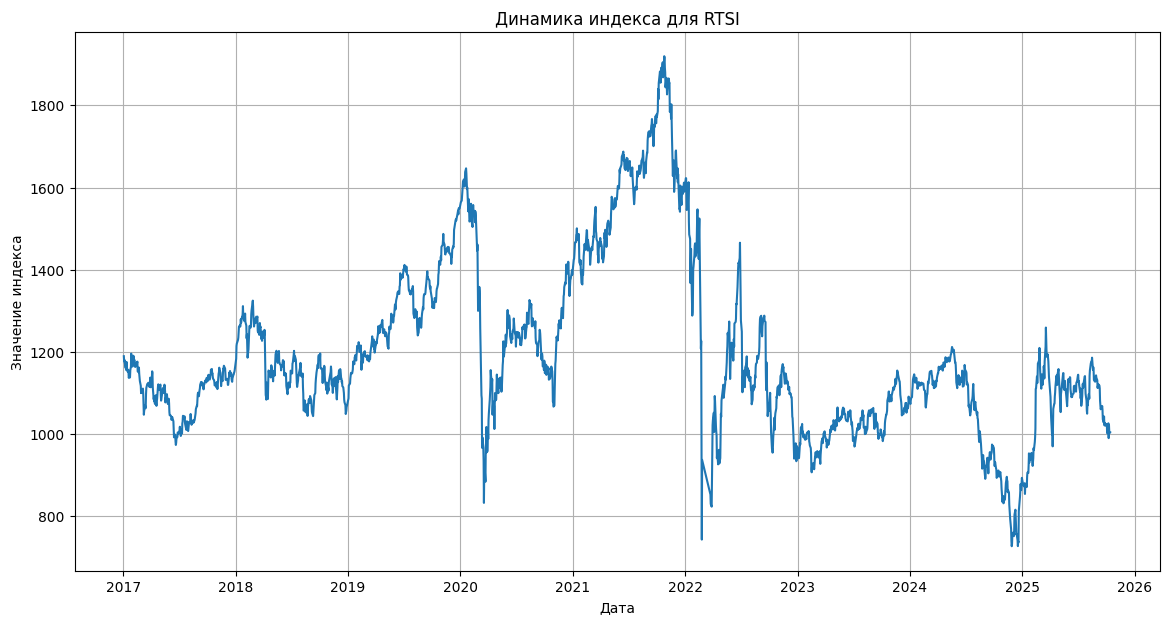

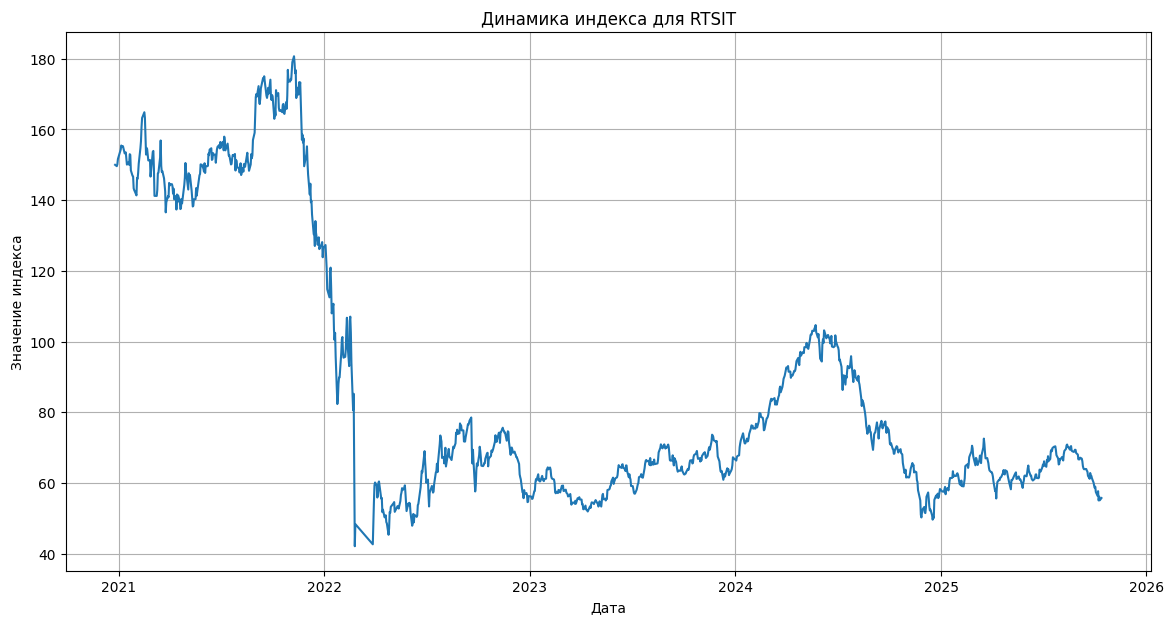

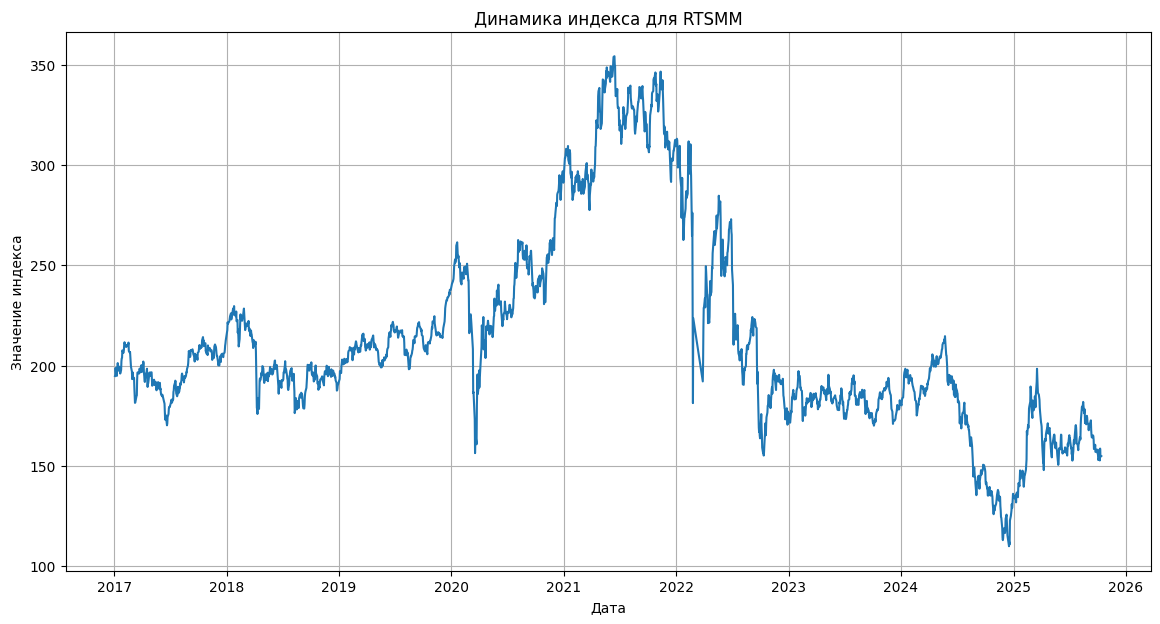

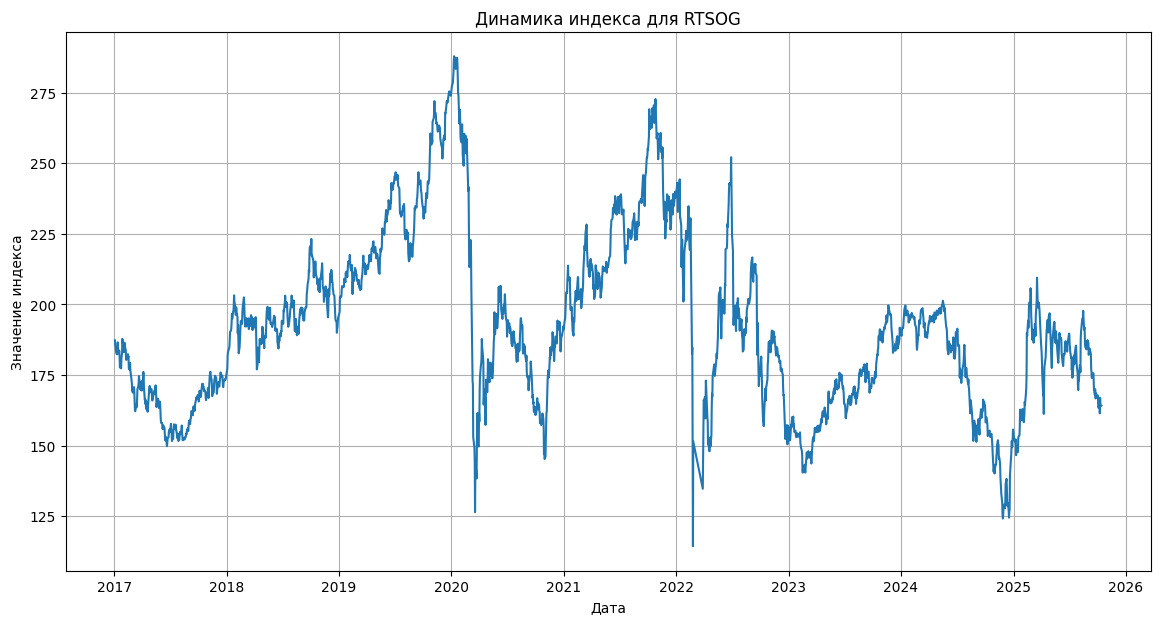

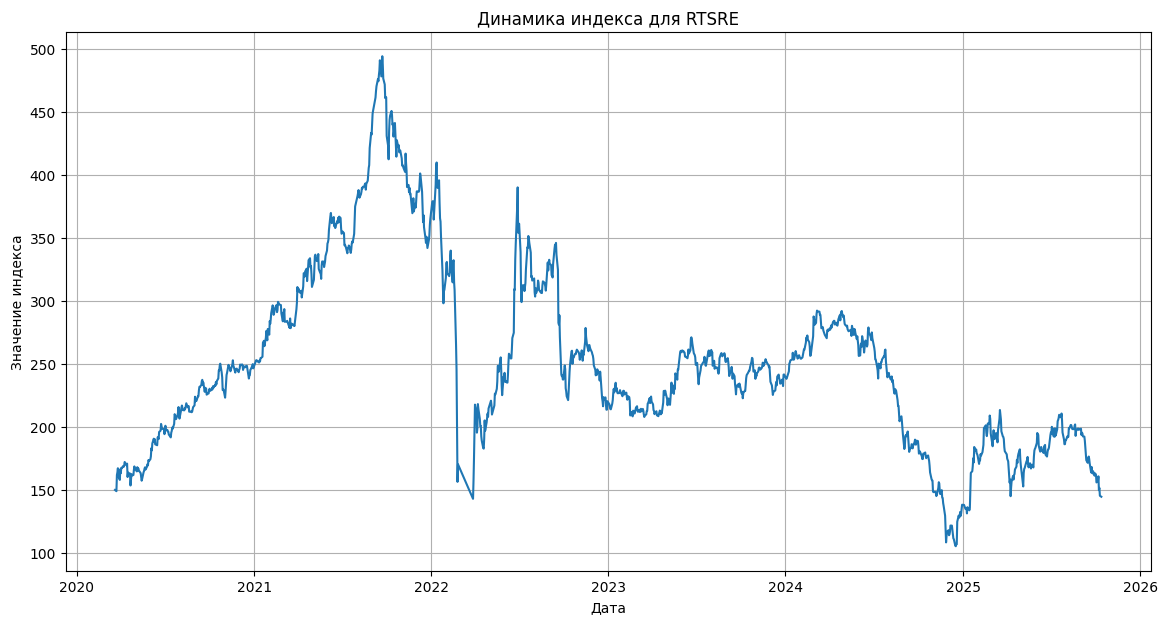

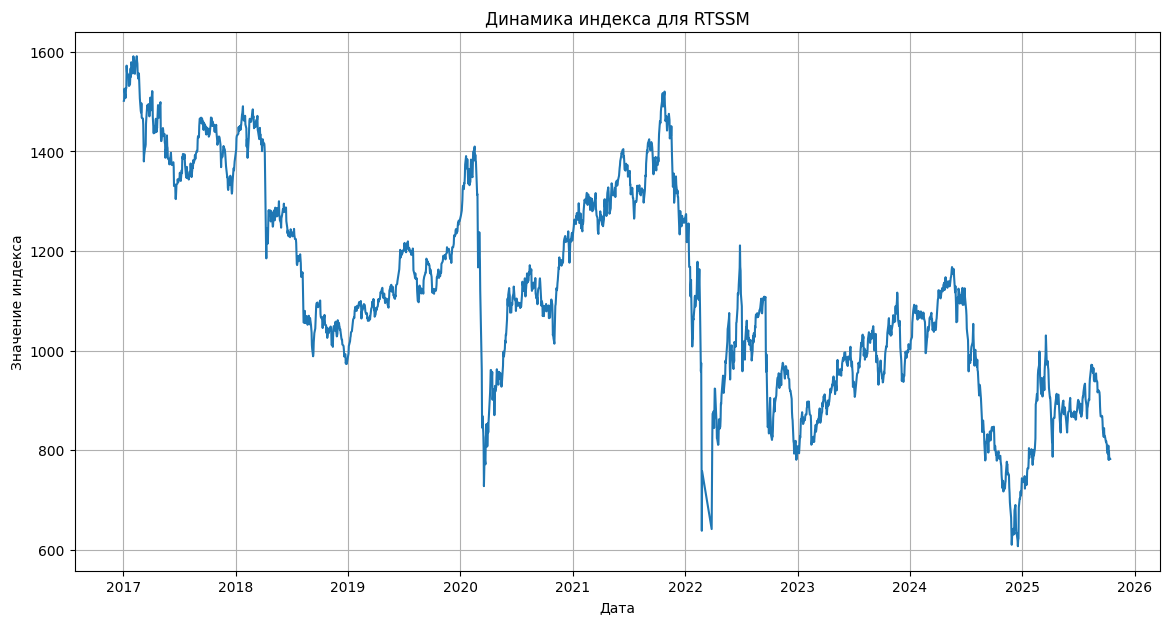

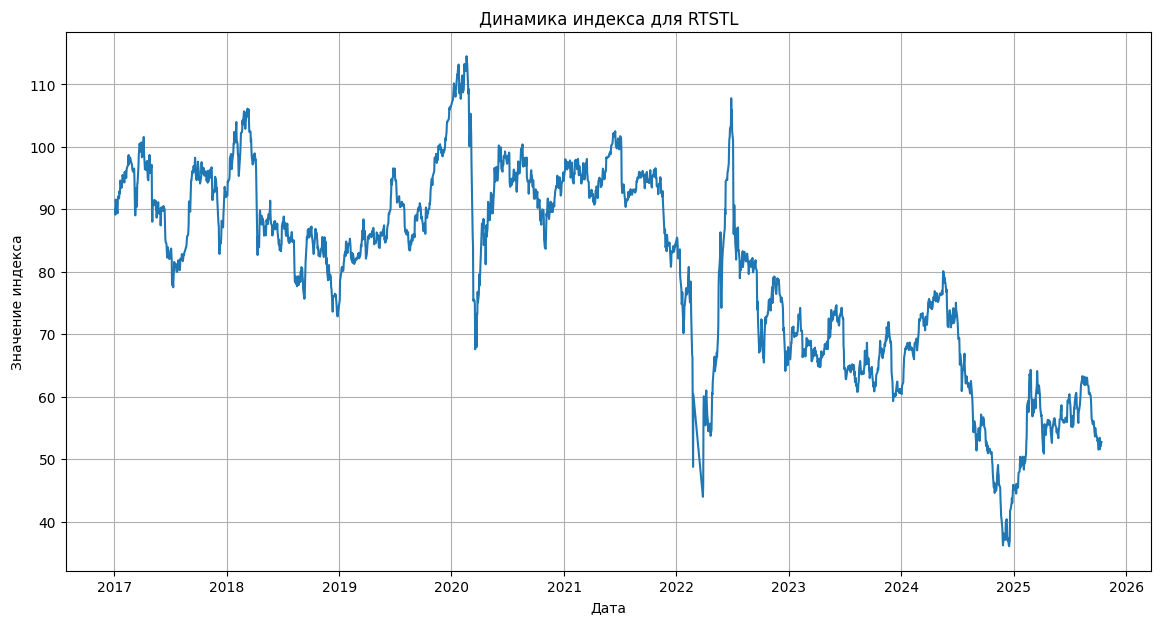

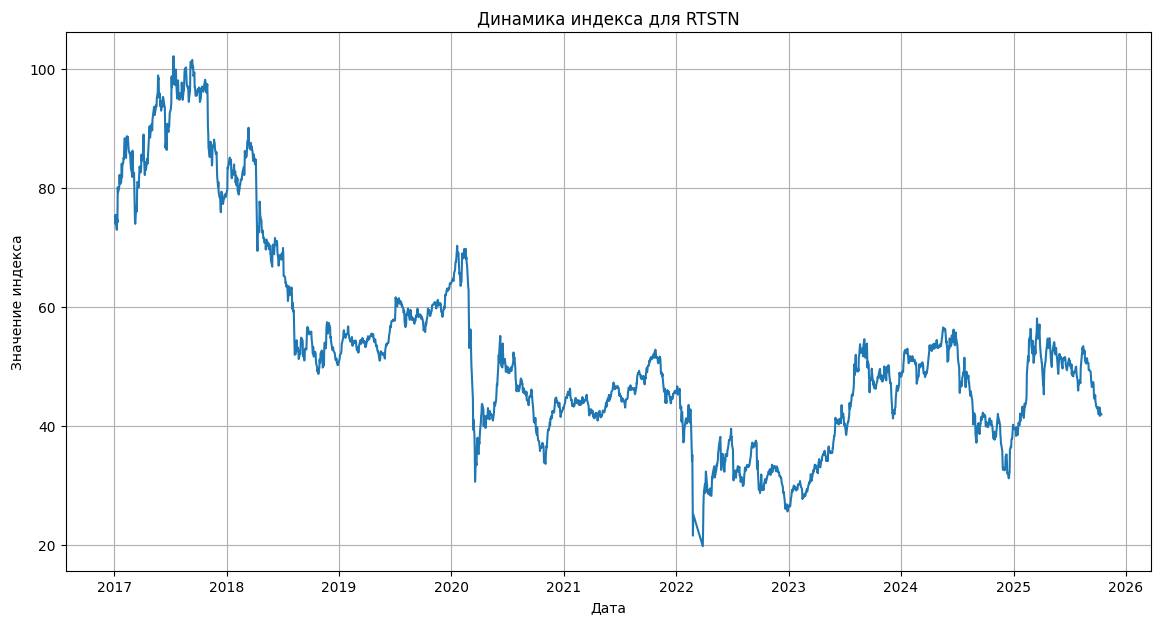

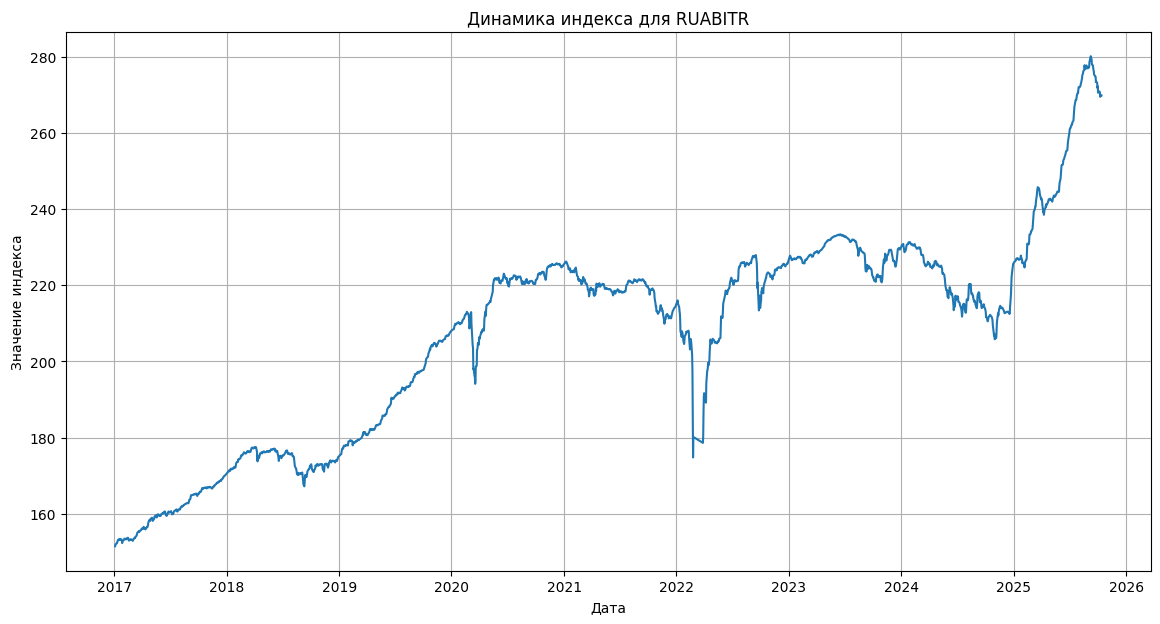

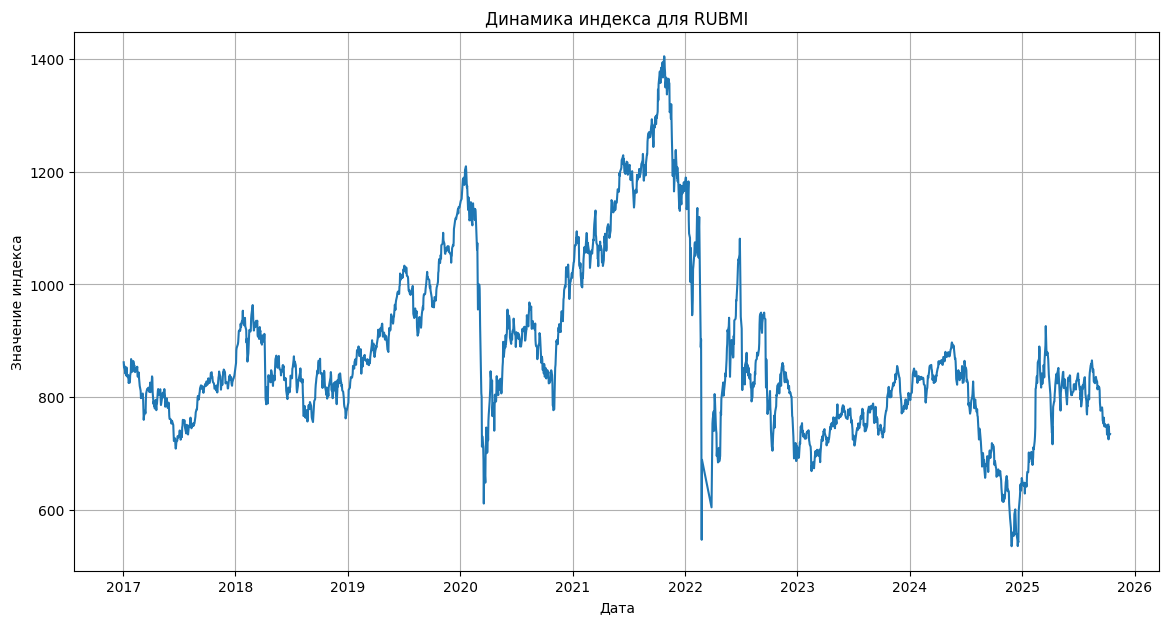

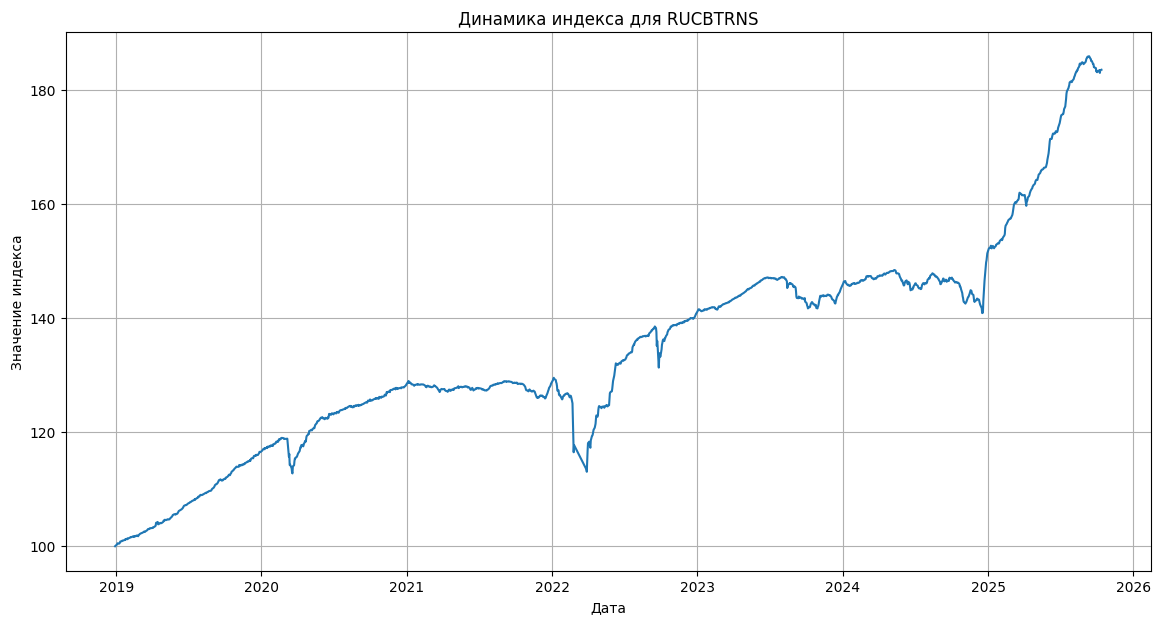

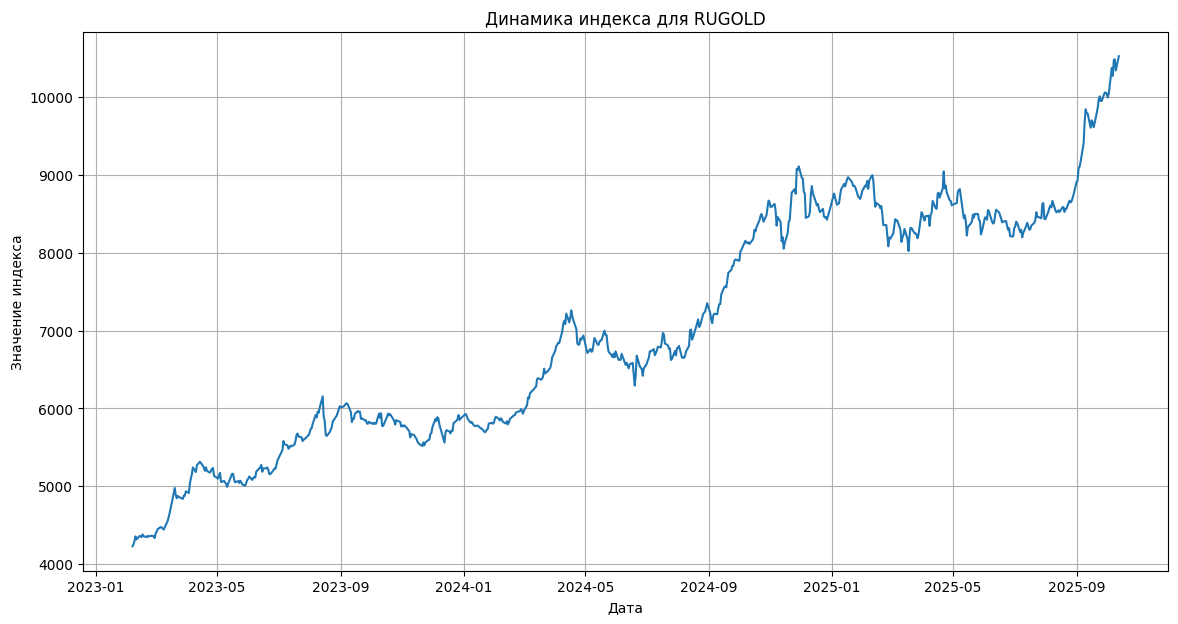

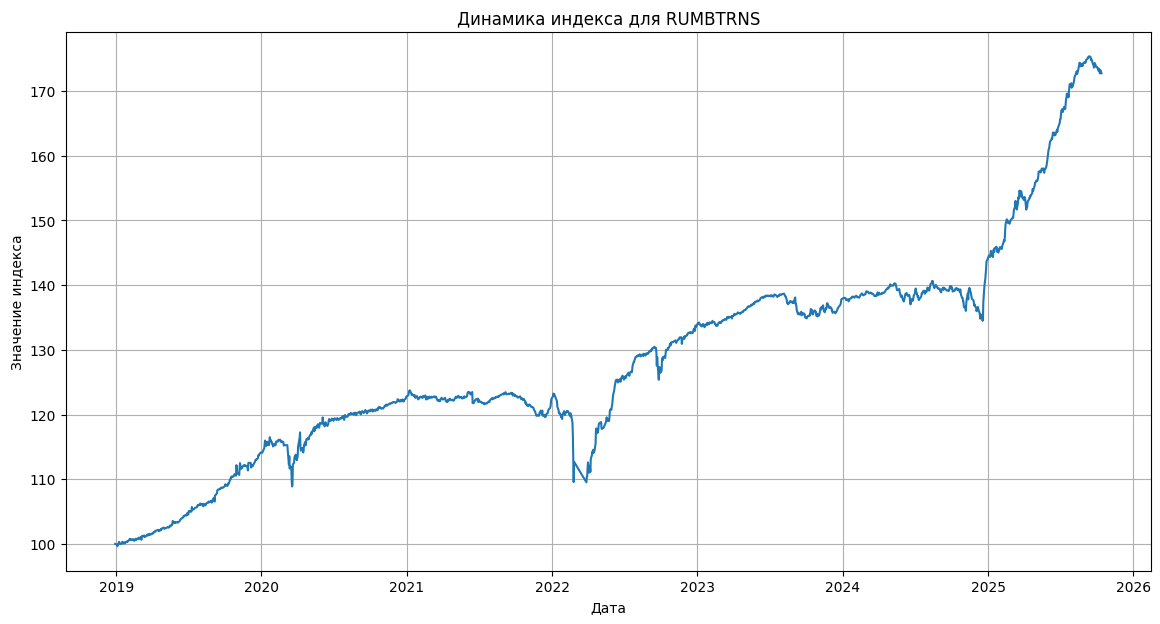

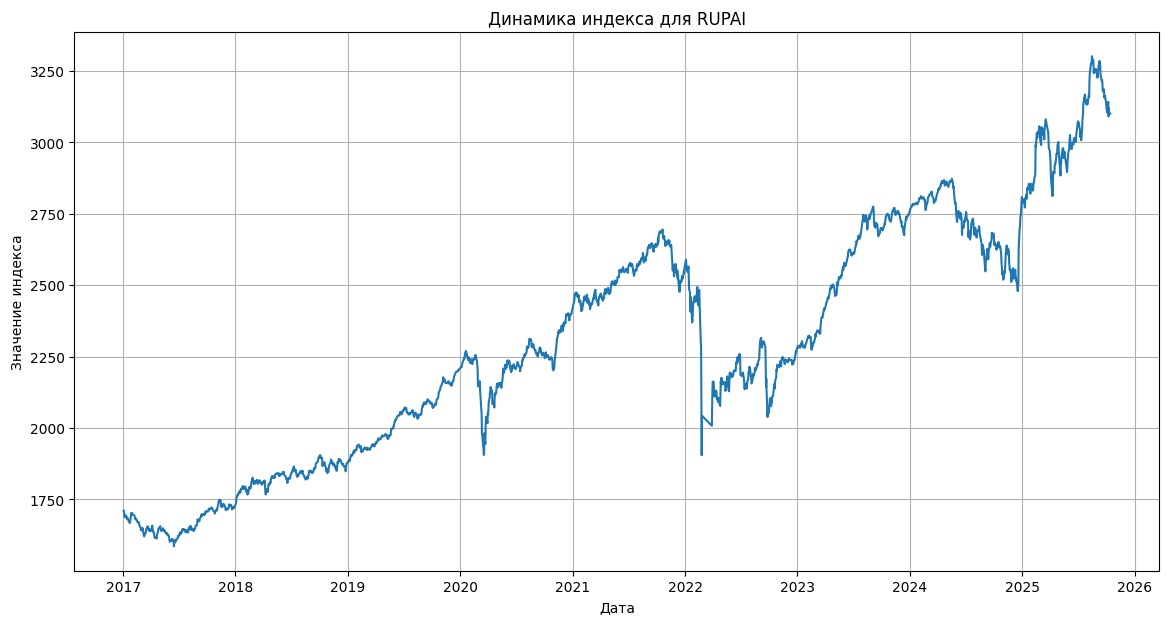

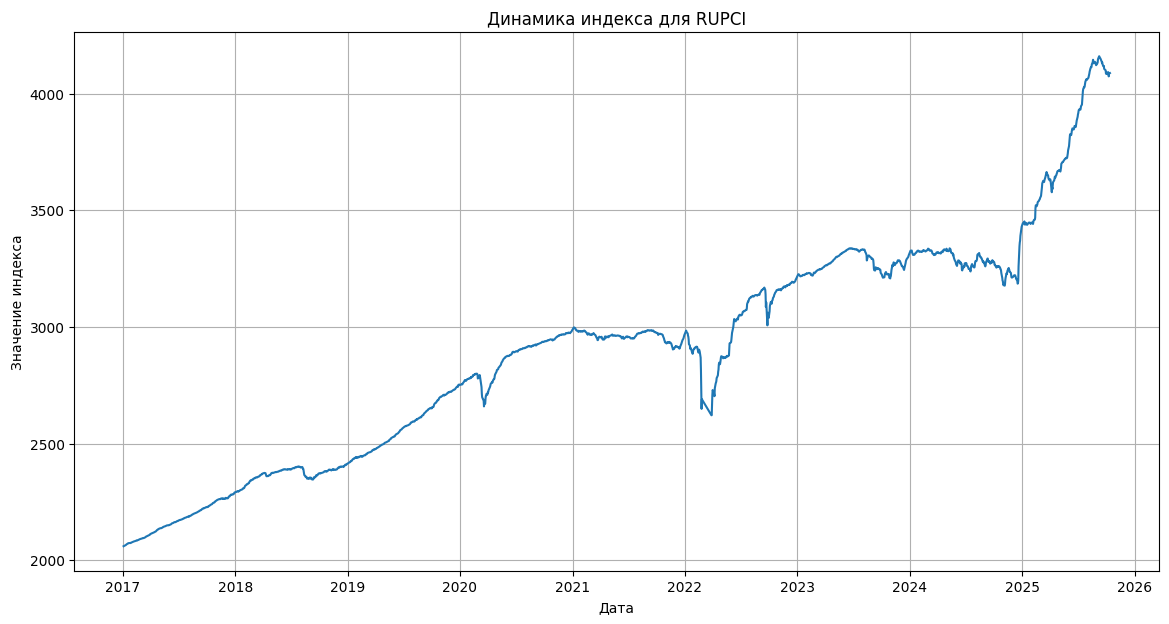

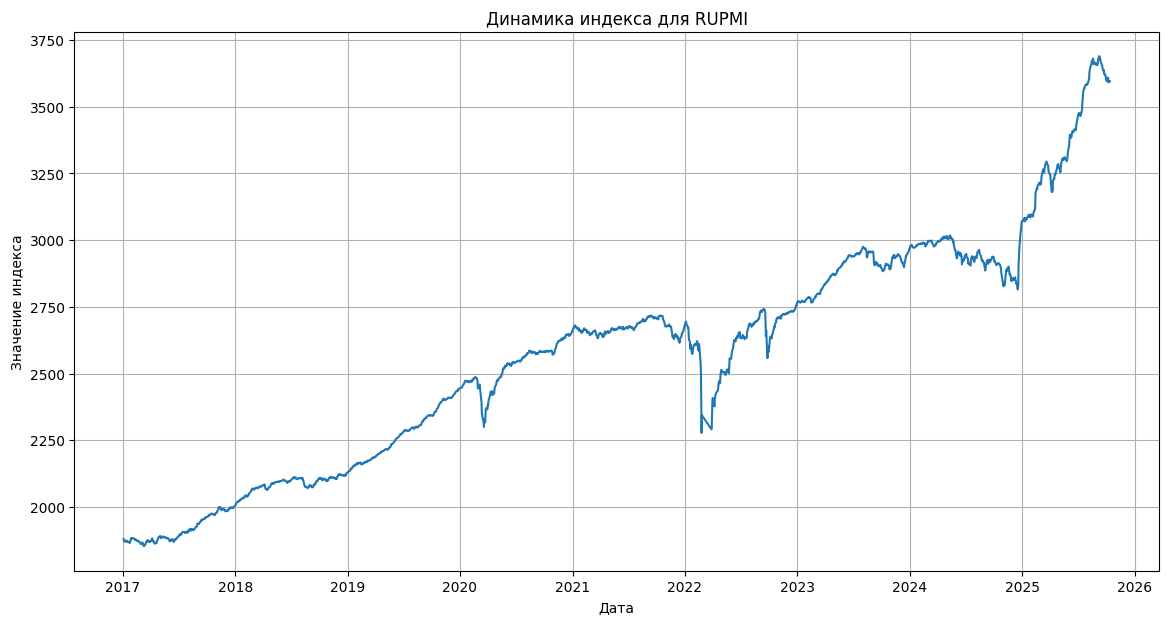

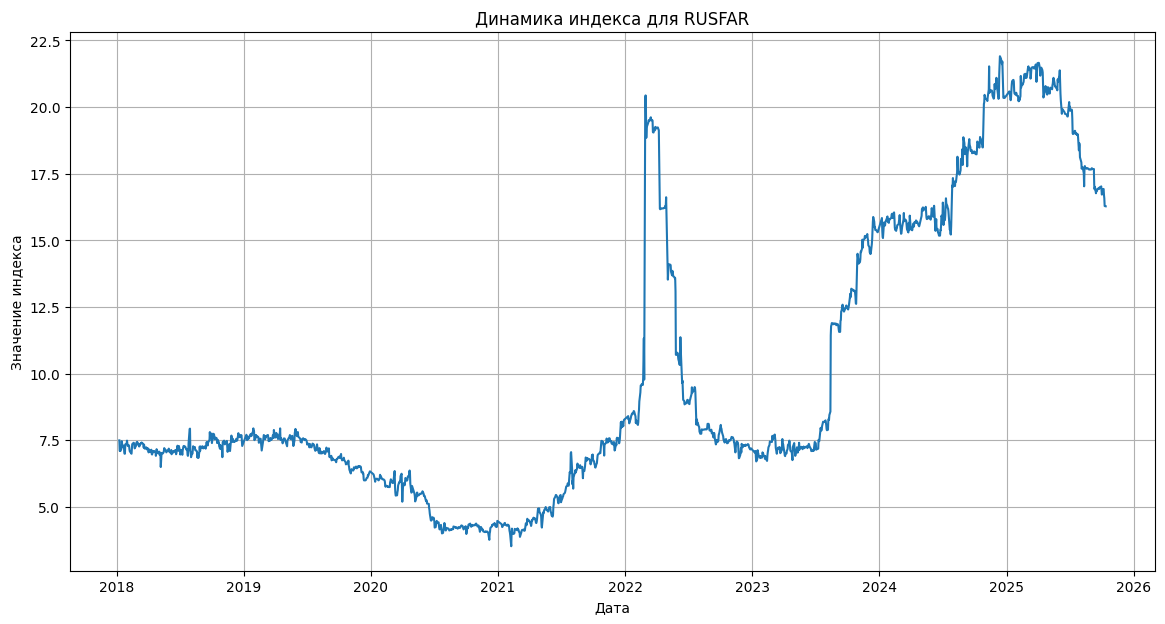

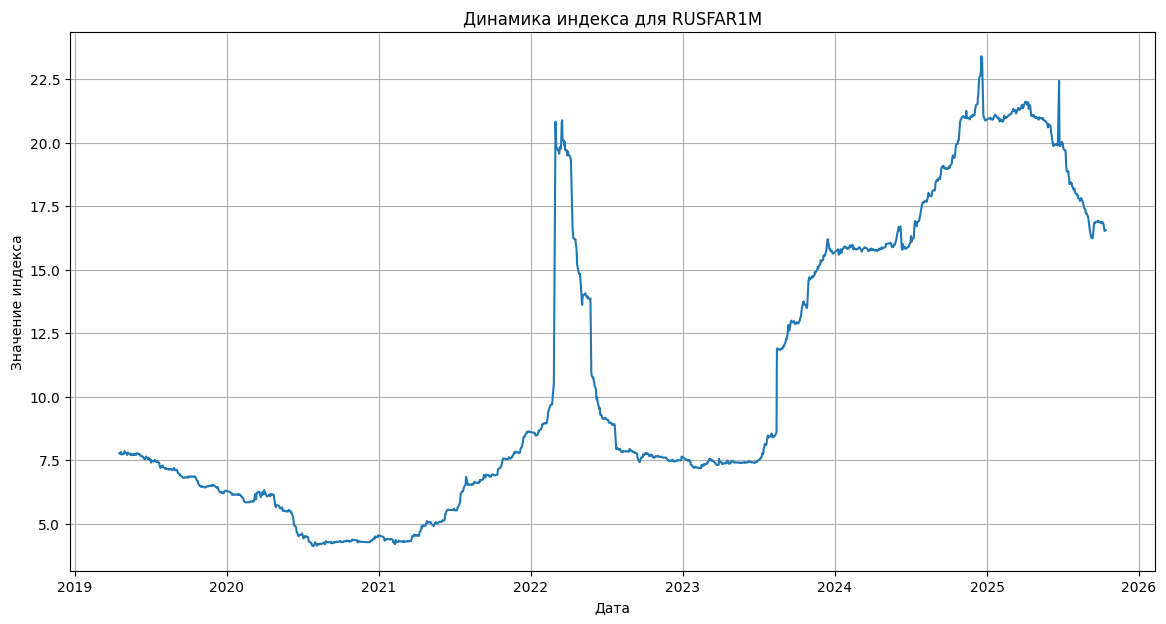

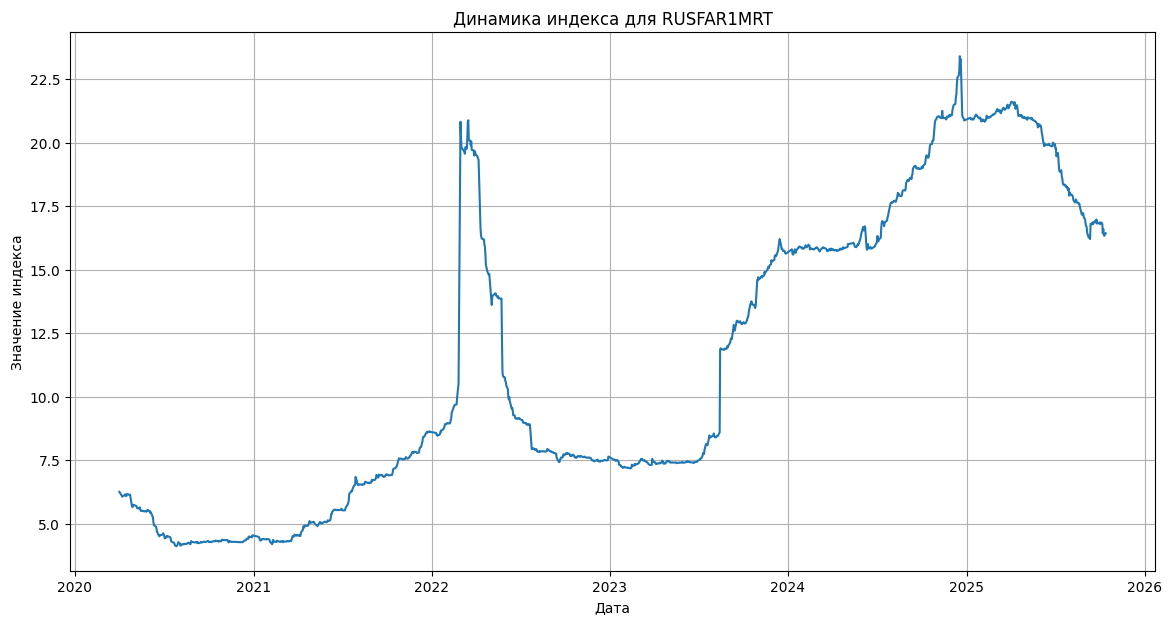

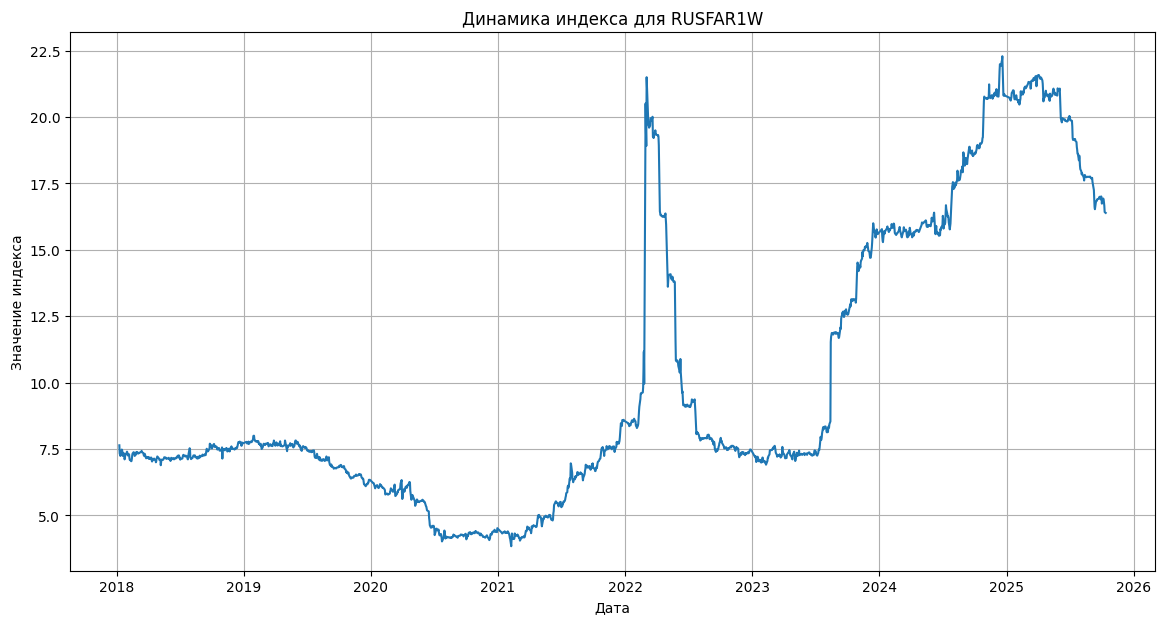

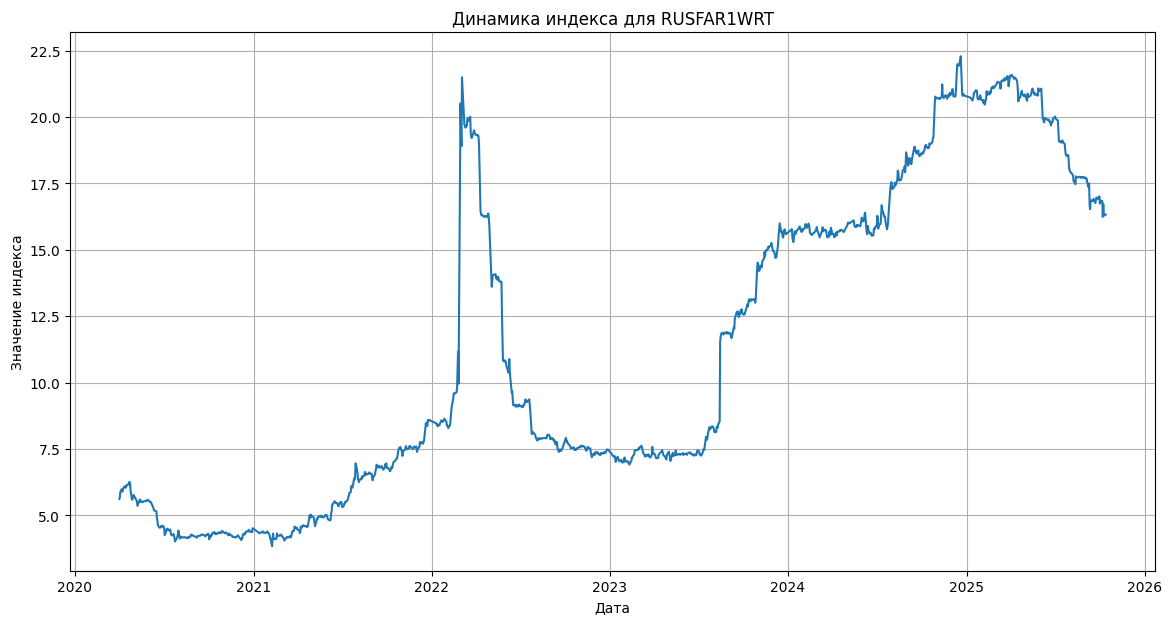

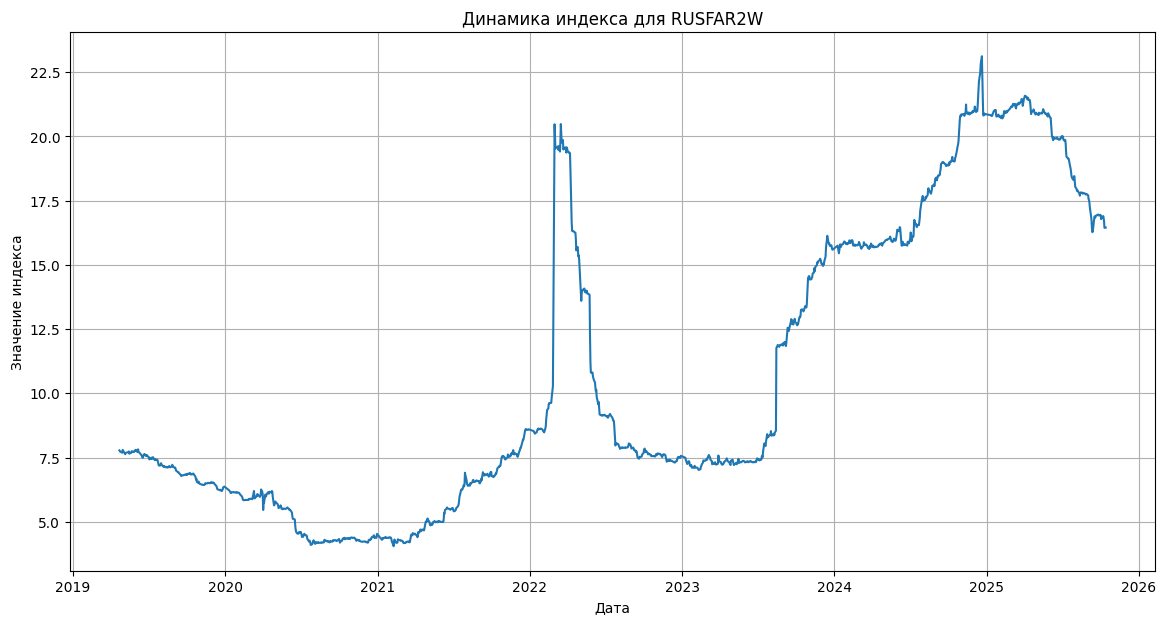

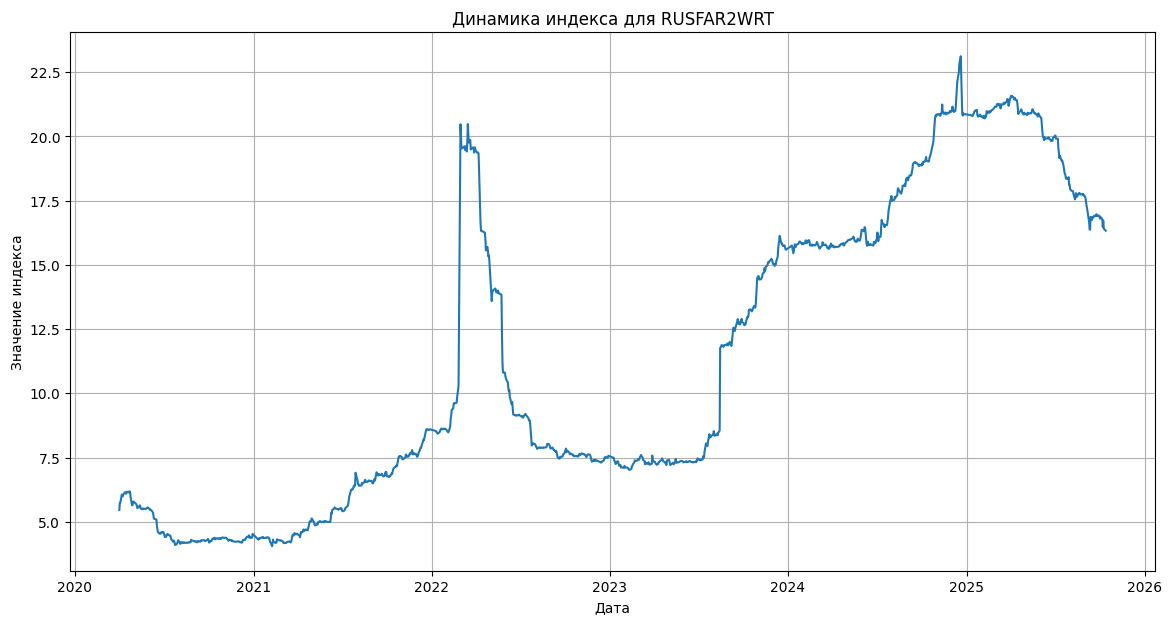

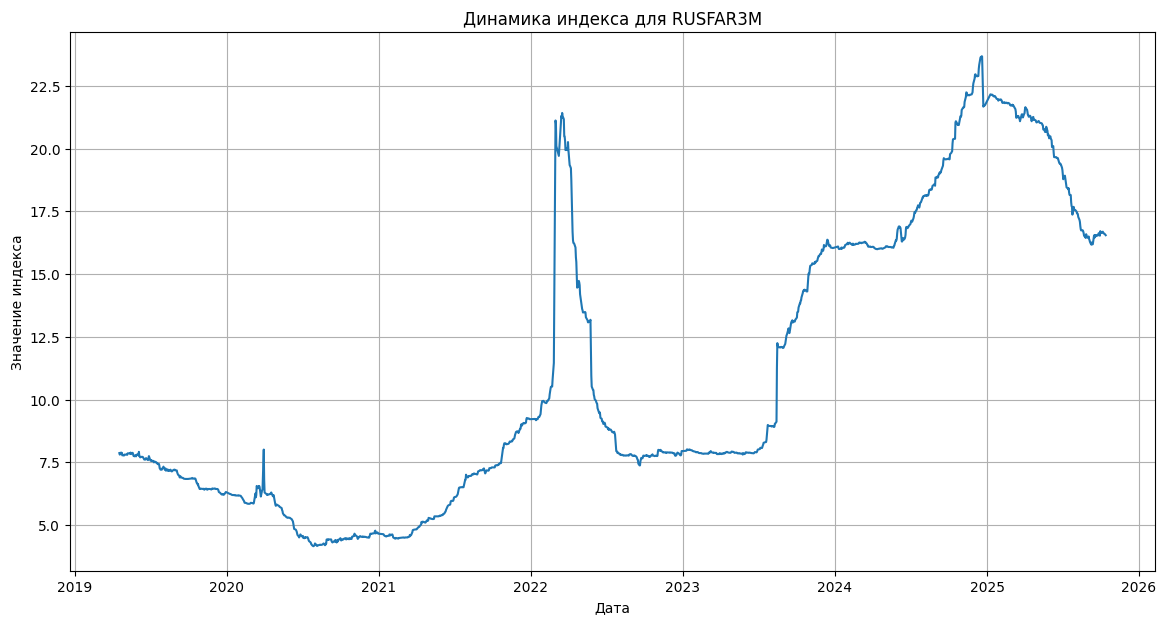

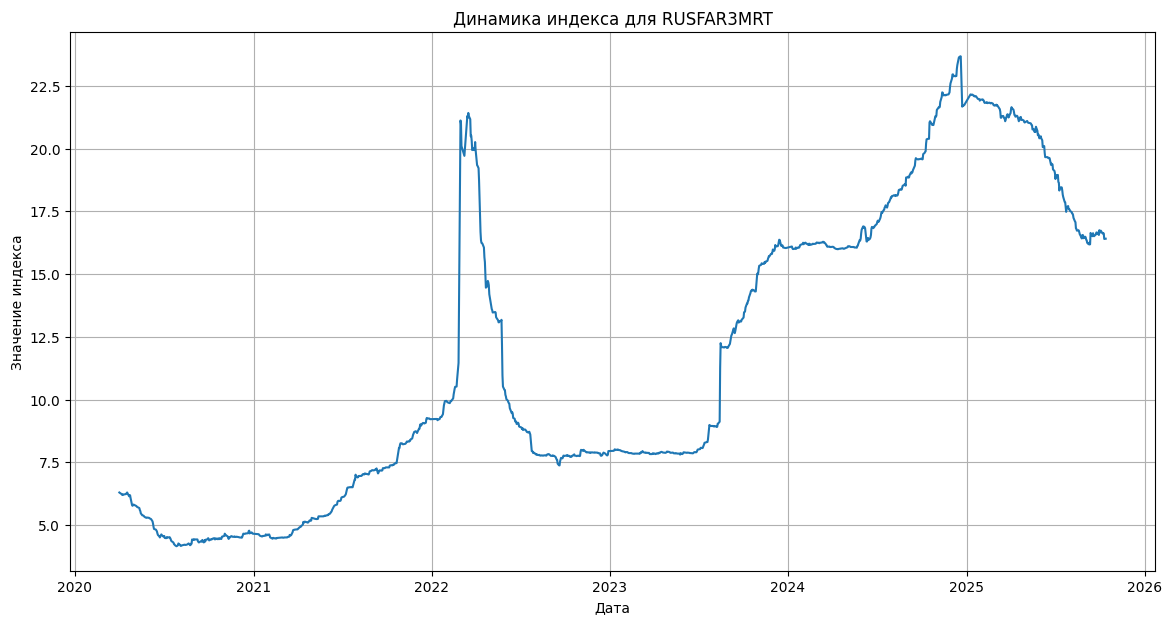

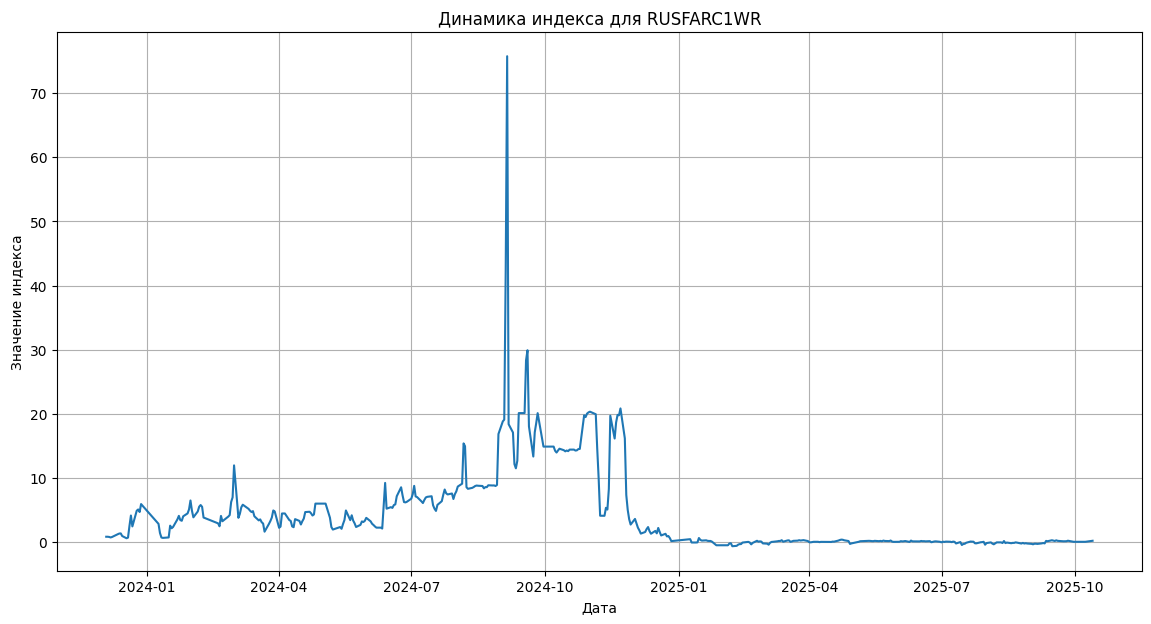

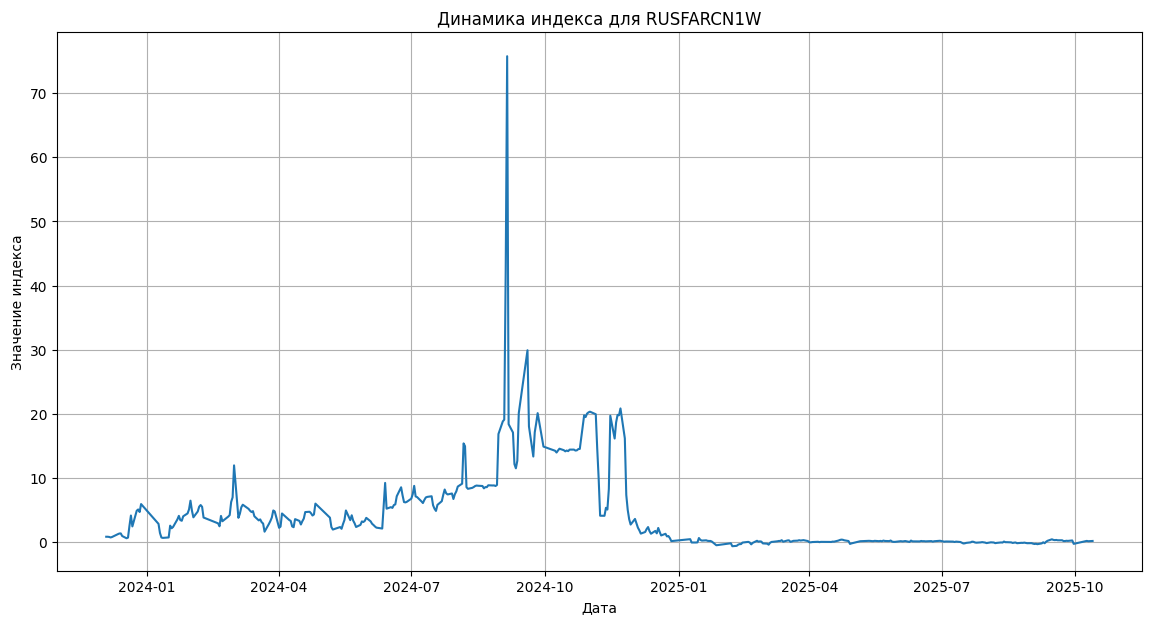

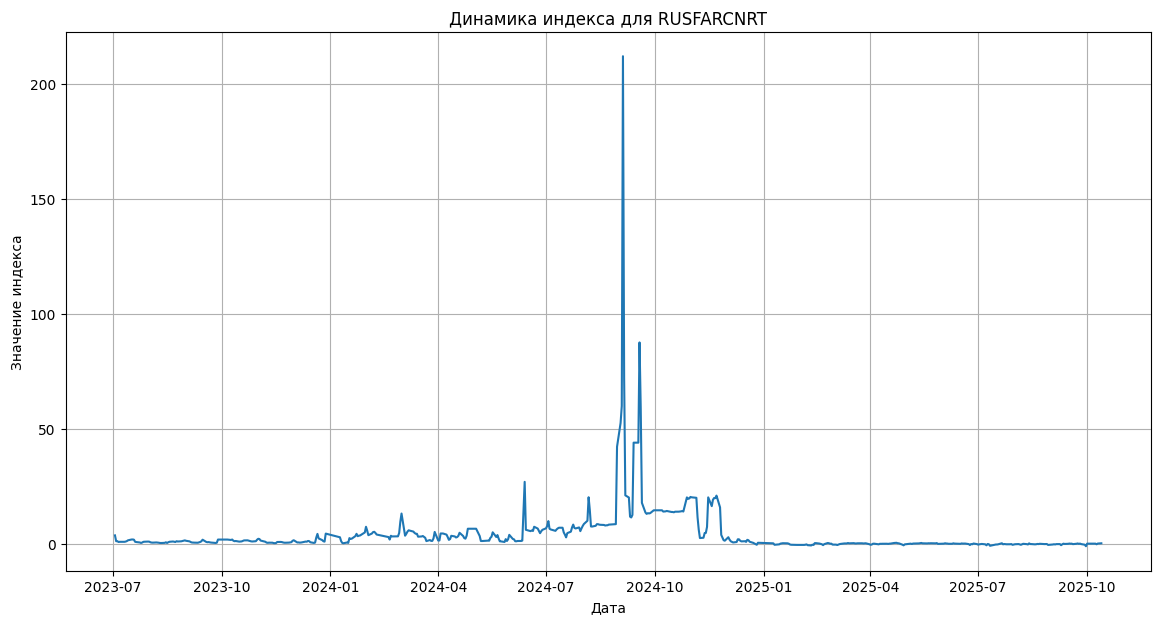

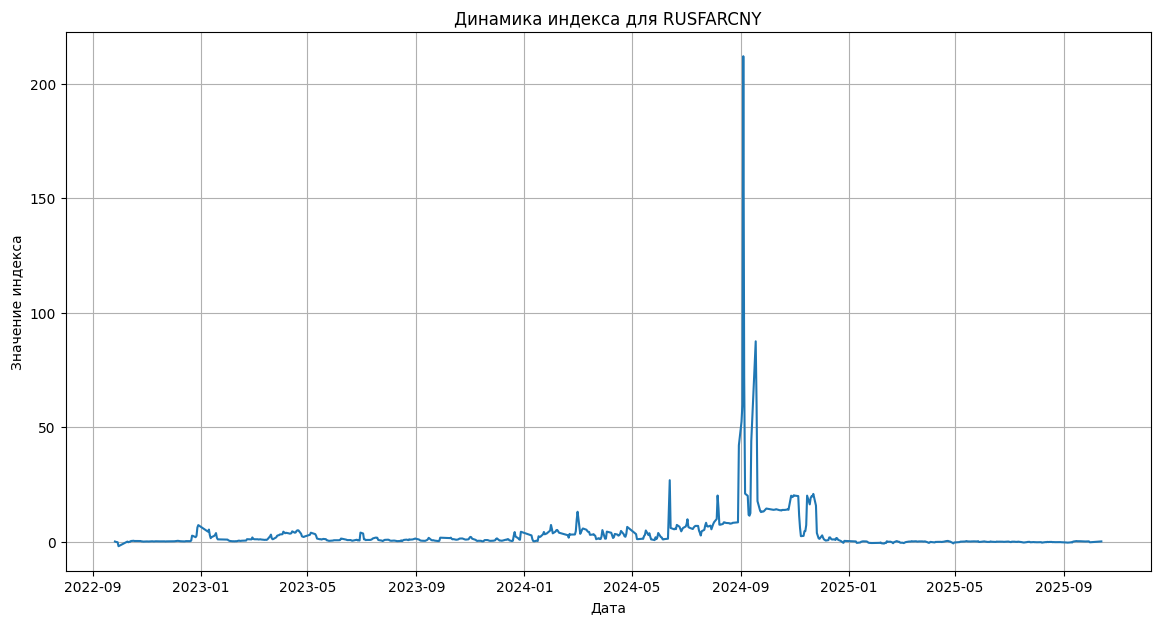

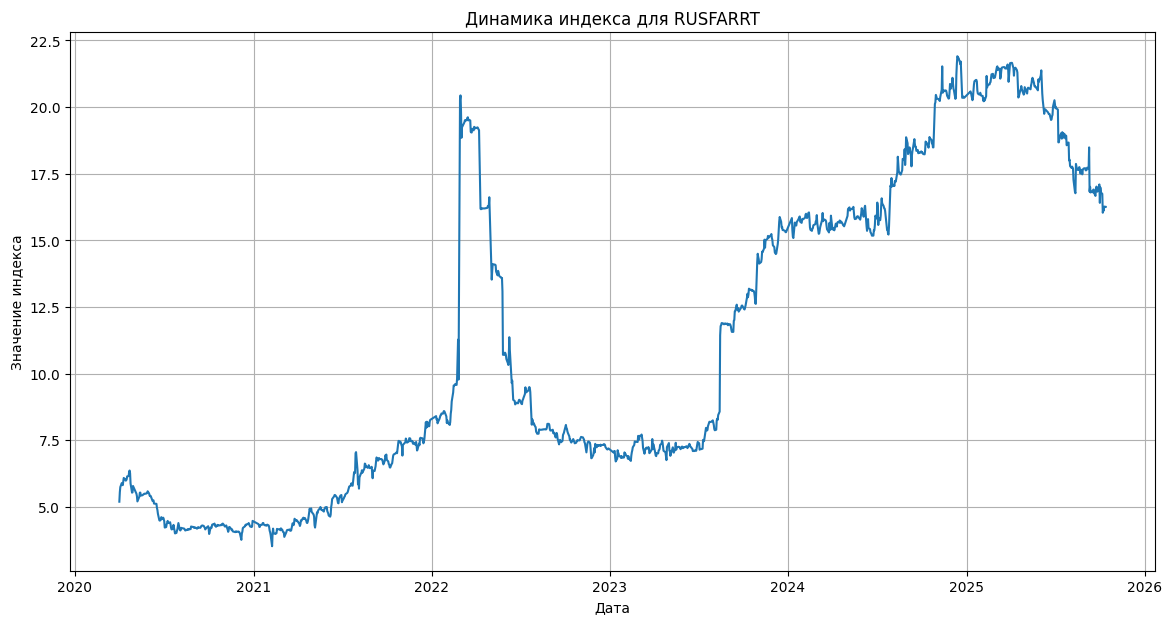

In [24]:
for code in df_indices['index_code'].unique():
    subset = df_indices[df_indices['index_code'] == code]
    plt.figure(figsize=(14, 7))
    plt.plot(subset['date'], subset['close'])
    plt.title(f'Динамика индекса для {code}')
    plt.xlabel('Дата')
    plt.ylabel('Значение индекса')
    plt.grid(True)
    plt.show()

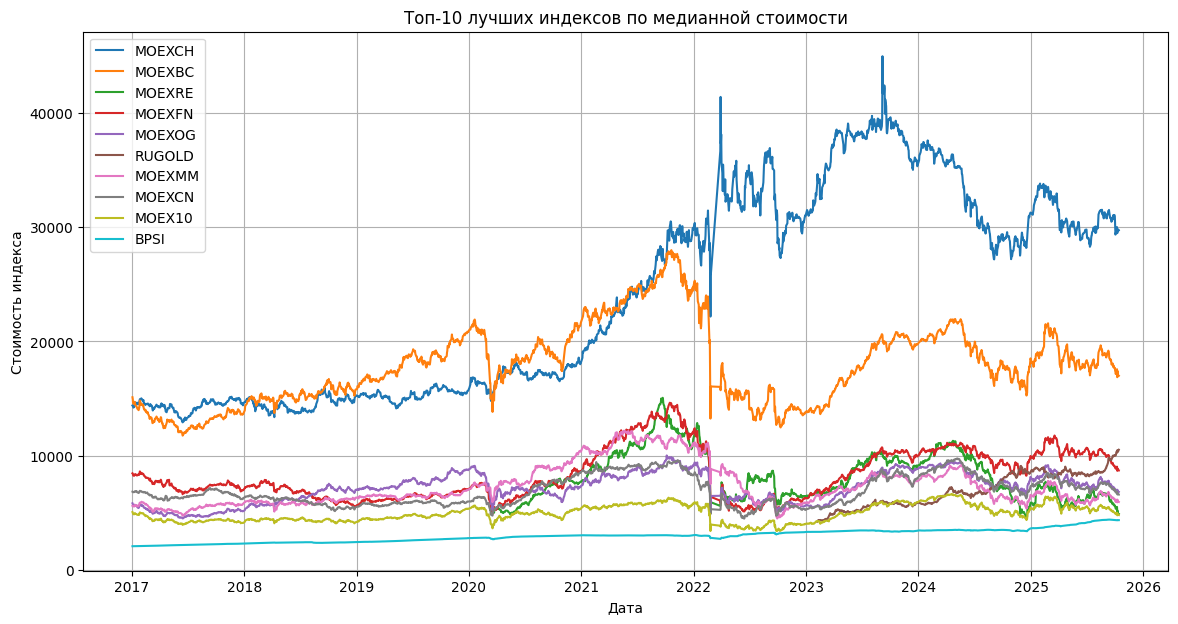

In [43]:
median_values = df_indices.groupby('index_code')['close'].median()

top_10_best = median_values.nlargest(10).index

plt.figure(figsize=(14,7))
for code in top_10_best:
    subset = df_indices[df_indices['index_code'] == code]
    plt.plot(subset['date'], subset['close'], label=code)
plt.title('Топ-10 лучших индексов по медианной стоимости')
plt.xlabel('Дата')
plt.ylabel('Стоимость индекса')
plt.legend()
plt.grid(True)
plt.show()
